In [3]:
import os  # For filesystem operations
import shutil  # for filesystem operations
from math import hypot  # For plotting
from typing import *

import anndata as ad  # For reading/writing AnnData files
import matplotlib.pyplot as plt  # For plotting
import metacells as mc  # The Metacells package
import numpy as np  # For array/matrix operations
import pandas as pd  # For data frames
import scipy.sparse as sp  # For sparse matrices
import seaborn as sb  # For plotting

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import scanpy as sc

In [2]:
adata = ad.read_h5ad("human.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 156285 × 29813
    obs: 'Cluster', 'Neighborhood', 'Subclass', 'CrossSpeciesCluster', 'nCount_RNA', 'nFeature_RNA', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: 'Cluster_colors', 'CrossSpeciesCluster_colors', 'Neighborhood_colors', 'Subclass_colors', 'batch_condition', 'default_embedding', 'is_primary_data', 'log1p', 'schema_version', 'title'
    obsm: 'X_umap'

In [106]:
adata.obs["tissue"]

F1S4_160106_003_A01                      middle temporal gyrus
F1S4_160106_037_A01                      middle temporal gyrus
F1S4_160106_038_A01                      middle temporal gyrus
F1S4_160106_039_A01                      middle temporal gyrus
F1S4_160106_040_A01                      middle temporal gyrus
                                                 ...          
TTTGTTGAGTATAGAC-16LKTX_191204_02_H01    middle temporal gyrus
TTTGTTGCATAATCGC-16LKTX_191204_02_H01    middle temporal gyrus
TTTGTTGGTACGATGG-16LKTX_191204_02_H01    middle temporal gyrus
TTTGTTGGTGGACCTC-16LKTX_191204_02_H01    middle temporal gyrus
TTTGTTGTCTCATAGG-16LKTX_191204_02_H01    middle temporal gyrus
Name: tissue, Length: 156285, dtype: category
Categories (1, object): ['middle temporal gyrus']

In [5]:
adata.X.max()

12.268496

In [9]:
adata.raw.X.max()

331298.0

In [11]:
adata.obs["assay"].value_counts()

assay
10x 3' v3       141782
Smart-seq v4     14503
Name: count, dtype: int64

In [13]:
adata_10x = adata[adata.obs.assay == "10x 3' v3"]

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [18]:
adata_10x.obs

Cluster Neighborhood Subclass  \
AAACGAAAGCACTAAA-1LKTX_191204_01_A01      Astro_1         glia    Astro   
AAAGGATTCAGGTGTT-1LKTX_191204_01_A01      Astro_2         glia    Astro   
AAAGTGAAGGCGTTAG-1LKTX_191204_01_A01      Astro_2         glia    Astro   
AAAGTGAAGGTAAGTT-1LKTX_191204_01_A01      Oligo_4         glia    Oligo   
AAAGTGACACAGTCGC-1LKTX_191204_01_A01      Oligo_4         glia    Oligo   
...                                           ...          ...      ...   
TTTGTTGAGTATAGAC-16LKTX_191204_02_H01  L2/3 IT_10     it_types  L2/3 IT   
TTTGTTGCATAATCGC-16LKTX_191204_02_H01  L2/3 IT_12     it_types  L2/3 IT   
TTTGTTGGTACGATGG-16LKTX_191204_02_H01   L2/3 IT_5     it_types  L2/3 IT   
TTTGTTGGTGGACCTC-16LKTX_191204_02_H01  L2/3 IT_12     it_types  L2/3 IT   
TTTGTTGTCTCATAGG-16LKTX_191204_02_H01   L2/3 IT_1     it_types  L2/3 IT   

                                      CrossSpeciesCluster  nCount_RNA  \
AAACGAAAGCACTAAA-1LKTX_191204_01_A01              Astro_1        6394   
AAAGGATTCAGGTGTT-1LKTX_191204_01_A01              Astro_1        4754   
AAAGTGAAGGCGTTAG-1LKTX_191204_01_A01              Astro_1        6681   
AAAGTGAAGGTAAGTT-1LKTX_191204_01_A01              Oligo_1        3756   
AAAGTGACACAGTCGC-1LKTX_191204_01_A01              Oligo_1        3768   
...                                                   ...         ...   
TTTGTTGAGTATAGAC-16LKTX_191204_02_H01           L2/3 IT_3       36562   
TTTGTTGCATAATCGC-16LKTX_191204_02_H01           L2/3 IT_1       32754   
TTTGTTGGTACGATGG-16LKTX_191204_02_H01           L2/3 IT_1       20870   
TTTGTTGGTGGACCTC-16LKTX_191204_02_H01           L2/3 IT_1       36135   
TTTGTTGTCTCATAGG-16LKTX_191204_02_H01           L2/3 IT_1       24298   

                                       nFeature_RNA assay_ontology_term_id  \
AAACGAAAGCACTAAA-1LKTX_191204_01_A01           2967            EFO:0009922   
AAAGGATTCAGGTGTT-1LKTX_191204_01_A01           2409            EFO:0009922   
AAAGTGAAGGCGTTAG-1LKTX_191204_01_A01           2905            EFO:0009922   
AAAGTGAAGGTAAGTT-1LKTX_191204_01_A01           2052            EFO:0009922   
AAAGTGACACAGTCGC-1LKTX_191204_01_A01           1952            EFO:0009922   
...                                             ...                    ...   
TTTGTTGAGTATAGAC-16LKTX_191204_02_H01          7931            EFO:0009922   
TTTGTTGCATAATCGC-16LKTX_191204_02_H01          7578            EFO:0009922   
TTTGTTGGTACGATGG-16LKTX_191204_02_H01          6483            EFO:0009922   
TTTGTTGGTGGACCTC-16LKTX_191204_02_H01          8124            EFO:0009922   
TTTGTTGTCTCATAGG-16LKTX_191204_02_H01          6589            EFO:0009922   

                                      cell_type_ontology_term_id  \
AAACGAAAGCACTAAA-1LKTX_191204_01_A01                  CL:0002605   
AAAGGATTCAGGTGTT-1LKTX_191204_01_A01                  CL:0002605   
AAAGTGAAGGCGTTAG-1LKTX_191204_01_A01                  CL:0002605   
AAAGTGAAGGTAAGTT-1LKTX_191204_01_A01                  CL:0000128   
AAAGTGACACAGTCGC-1LKTX_191204_01_A01                  CL:0000128   
...                                                          ...   
TTTGTTGAGTATAGAC-16LKTX_191204_02_H01                 CL:4023040   
TTTGTTGCATAATCGC-16LKTX_191204_02_H01                 CL:4023040   
TTTGTTGGTACGATGG-16LKTX_191204_02_H01                 CL:4023040   
TTTGTTGGTGGACCTC-16LKTX_191204_02_H01                 CL:4023040   
TTTGTTGTCTCATAGG-16LKTX_191204_02_H01                 CL:4023040   

                                      development_stage_ontology_term_id  \
AAACGAAAGCACTAAA-1LKTX_191204_01_A01                      HsapDv:0000144   
AAAGGATTCAGGTGTT-1LKTX_191204_01_A01                      HsapDv:0000144   
AAAGTGAAGGCGTTAG-1LKTX_191204_01_A01                      HsapDv:0000144   
AAAGTGAAGGTAAGTT-1LKTX_191204_01_A01                      HsapDv:0000144   
AAAGTGACACAGTCGC-1LKTX_191204_01_A01                      HsapDv:0000144   
...                                                   

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


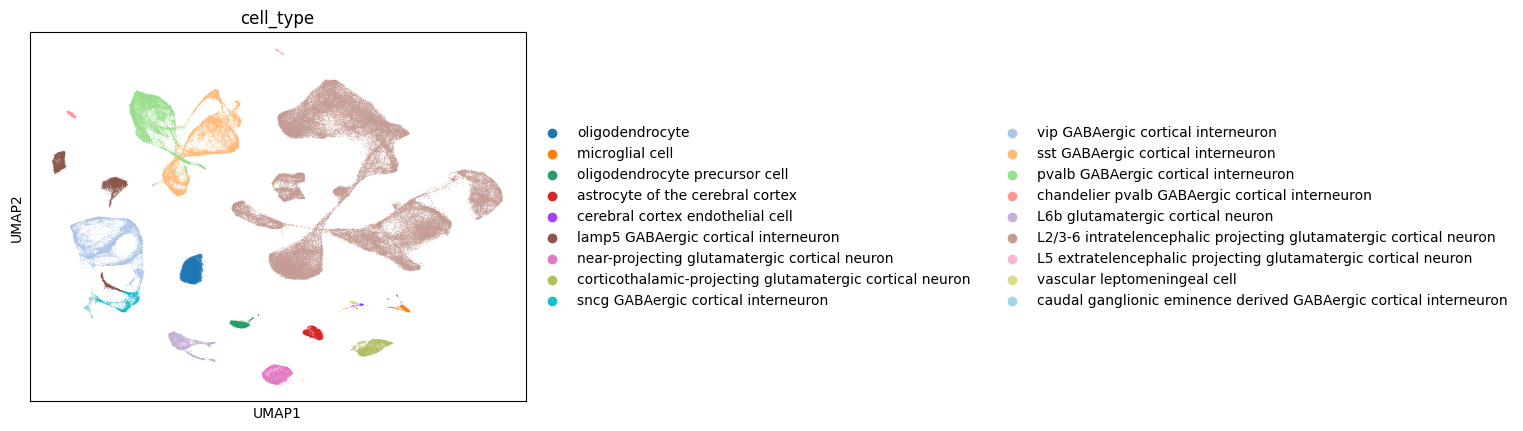

In [19]:
sc.pl.umap(adata_10x, color=["cell_type"])

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


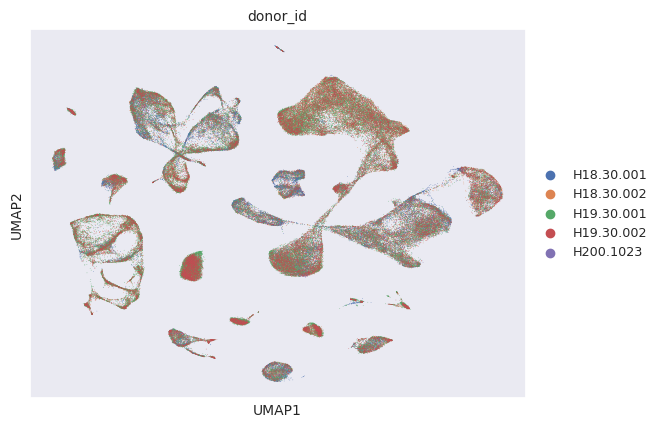

In [103]:
sc.pl.umap(adata_10x, color=["donor_id"])

In [21]:
adata_10x_raw = ad.AnnData(X=adata_10x.raw.X, obs=adata_10x.obs, var=adata_10x.var)

In [24]:
adata_10x_raw.var

feature_is_filtered feature_name feature_reference  \
gene                                                                  
ENSG00000233576                False      HTR3C2P    NCBITaxon:9606   
ENSG00000121410                False         A1BG    NCBITaxon:9606   
ENSG00000268895                False     A1BG-AS1    NCBITaxon:9606   
ENSG00000148584                False         A1CF    NCBITaxon:9606   
ENSG00000175899                False          A2M    NCBITaxon:9606   
...                              ...          ...               ...   
ENSG00000203995                False       ZYG11A    NCBITaxon:9606   
ENSG00000232242                False     ZYG11AP1    NCBITaxon:9606   
ENSG00000162378                False       ZYG11B    NCBITaxon:9606   
ENSG00000074755                False        ZZEF1    NCBITaxon:9606   
ENSG00000036549                False         ZZZ3    NCBITaxon:9606   

                feature_biotype  
gene                             
ENSG00000233576            gene  
ENSG00000121410            gene  
ENSG00000268895            gene  
ENSG00000148584            gene  
ENSG00000175899            gene  
...                         ...  
ENSG00000203995            gene  
ENSG00000232242            gene  
ENSG00000162378            gene  
ENSG00000074755            gene  
ENSG00000036549            gene  

[29813 rows x 4 columns]

In [28]:
full = adata_10x_raw
mc.ut.top_level(full)
mc.ut.set_name(full, "human_mtg_full")
print(f"Full: {full.n_obs} cells, {full.n_vars} genes")

Full: 141782 cells, 29813 genes


In [38]:
PROPERLY_SAMPLED_MIN_CELL_TOTAL = 200
PROPERLY_SAMPLED_MAX_CELL_TOTAL = 200000

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


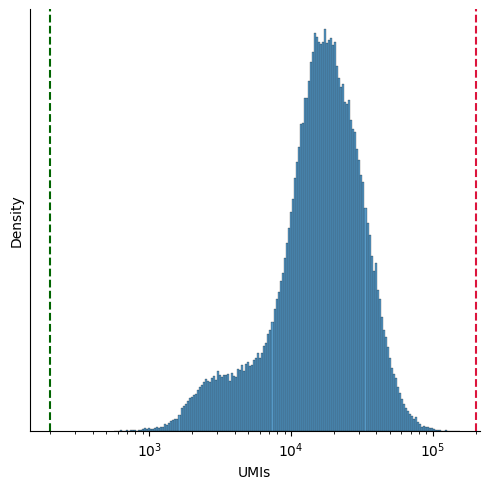

In [39]:
total_umis_per_cell = mc.ut.get_o_numpy(full, "__x__", sum=True)
plot = sb.displot(total_umis_per_cell, log_scale=(10, None))
plot.set(xlabel="UMIs", ylabel="Density", yticks=[])

plot.refline(x=PROPERLY_SAMPLED_MIN_CELL_TOTAL, color="darkgreen")
plot.refline(x=PROPERLY_SAMPLED_MAX_CELL_TOTAL, color="crimson")

In [40]:
## since the data is filtered by cellxgene and the author I do not exclude any cell types here

In [41]:
too_small_cells_count = np.sum(total_umis_per_cell < PROPERLY_SAMPLED_MIN_CELL_TOTAL)
too_large_cells_count = np.sum(total_umis_per_cell > PROPERLY_SAMPLED_MAX_CELL_TOTAL)

total_umis_per_cell = mc.ut.get_o_numpy(full, name="__x__", sum=True)
too_small_cells_percent = 100.0 * too_small_cells_count / full.n_obs
too_large_cells_percent = 100.0 * too_large_cells_count / full.n_vars

print(
    f"Will exclude {too_small_cells_count} ({too_small_cells_percent:.2f}%%) cells"
    f" with less than {PROPERLY_SAMPLED_MIN_CELL_TOTAL} UMIs"
)
print(
    f"Will exclude {too_large_cells_count} ({too_large_cells_percent:.2f}%%) cells"
    f" with more than {PROPERLY_SAMPLED_MAX_CELL_TOTAL} UMIs"
)

Will exclude 0 (0.00%%) cells with less than 200 UMIs
Will exclude 0 (0.00%%) cells with more than 200000 UMIs


In [42]:
EXCLUDED_GENE_NAMES = ["XIST", "MALAT1"]  # Sex-specific genes.
EXCLUDED_GENE_PATTERNS = ["MT-.*"]

In [44]:
full.var

feature_is_filtered feature_name feature_reference  \
gene                                                                  
ENSG00000233576                False      HTR3C2P    NCBITaxon:9606   
ENSG00000121410                False         A1BG    NCBITaxon:9606   
ENSG00000268895                False     A1BG-AS1    NCBITaxon:9606   
ENSG00000148584                False         A1CF    NCBITaxon:9606   
ENSG00000175899                False          A2M    NCBITaxon:9606   
...                              ...          ...               ...   
ENSG00000203995                False       ZYG11A    NCBITaxon:9606   
ENSG00000232242                False     ZYG11AP1    NCBITaxon:9606   
ENSG00000162378                False       ZYG11B    NCBITaxon:9606   
ENSG00000074755                False        ZZEF1    NCBITaxon:9606   
ENSG00000036549                False         ZZZ3    NCBITaxon:9606   

                feature_biotype  
gene                             
ENSG00000233576            gene  
ENSG00000121410            gene  
ENSG00000268895            gene  
ENSG00000148584            gene  
ENSG00000175899            gene  
...                         ...  
ENSG00000203995            gene  
ENSG00000232242            gene  
ENSG00000162378            gene  
ENSG00000074755            gene  
ENSG00000036549            gene  

[29813 rows x 4 columns]

In [53]:
full.var_names = full.var.feature_name.astype(str).values

In [55]:
full.var

feature_is_filtered feature_name feature_reference feature_biotype
HTR3C2P                 False      HTR3C2P    NCBITaxon:9606            gene
A1BG                    False         A1BG    NCBITaxon:9606            gene
A1BG-AS1                False     A1BG-AS1    NCBITaxon:9606            gene
A1CF                    False         A1CF    NCBITaxon:9606            gene
A2M                     False          A2M    NCBITaxon:9606            gene
...                       ...          ...               ...             ...
ZYG11A                  False       ZYG11A    NCBITaxon:9606            gene
ZYG11AP1                False     ZYG11AP1    NCBITaxon:9606            gene
ZYG11B                  False       ZYG11B    NCBITaxon:9606            gene
ZZEF1                   False        ZZEF1    NCBITaxon:9606            gene
ZZZ3                    False         ZZZ3    NCBITaxon:9606            gene

[29813 rows x 4 columns]

In [68]:
mc.pl.exclude_genes(
    full,
    excluded_gene_names=EXCLUDED_GENE_NAMES,
    excluded_gene_patterns=EXCLUDED_GENE_PATTERNS,
    properly_sampled_min_gene_total=1,  ##get genes with at least one count,however still removed quite a bit of genes, the default is one and Yuyao checked in raw data
    random_seed=123456,
)

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
set human_mtg_full.var[bursty_lonely_gene]: 0 true (0%) out of 29813 bools
set human_mtg_full.var[properly_sampled_gene]: 19605 true (65.76%) out of 29813 bools
set human_mtg_full.var[excluded_gene]: 10242 true (34.35%) out of 29813 bools


In [70]:
full.var

feature_is_filtered feature_name feature_reference feature_biotype  \
HTR3C2P                 False      HTR3C2P    NCBITaxon:9606            gene   
A1BG                    False         A1BG    NCBITaxon:9606            gene   
A1BG-AS1                False     A1BG-AS1    NCBITaxon:9606            gene   
A1CF                    False         A1CF    NCBITaxon:9606            gene   
A2M                     False          A2M    NCBITaxon:9606            gene   
...                       ...          ...               ...             ...   
ZYG11A                  False       ZYG11A    NCBITaxon:9606            gene   
ZYG11AP1                False     ZYG11AP1    NCBITaxon:9606            gene   
ZYG11B                  False       ZYG11B    NCBITaxon:9606            gene   
ZZEF1                   False        ZZEF1    NCBITaxon:9606            gene   
ZZZ3                    False         ZZZ3    NCBITaxon:9606            gene   

          bursty_lonely_gene  properly_sampled_gene  excluded_gene  
HTR3C2P                False                  False           True  
A1BG                   False                   True          False  
A1BG-AS1               False                   True          False  
A1CF                   False                   True          False  
A2M                    False                   True          False  
...                      ...                    ...            ...  
ZYG11A                 False                   True          False  
ZYG11AP1               False                  False           True  
ZYG11B                 False                   True          False  
ZZEF1                  False                   True          False  
ZZZ3                   False                   True          False  

[29813 rows x 7 columns]

In [72]:
mc.tl.compute_excluded_gene_umis(full)

set human_mtg_full.obs[excluded_umis]: 141782 float32s


In [73]:
PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION = 0.30

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Will exclude 0 (0.00%) cells with more than 30.00% excluded gene UMIs


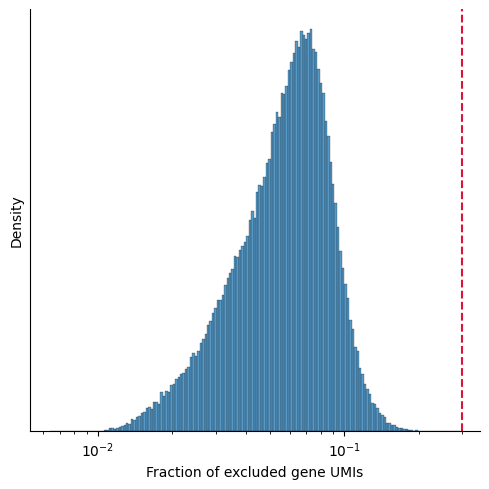

In [74]:
excluded_umis_fraction_regularization = 1e-3  # Avoid 0 values in log scale plot.
excluded_umis_per_cell = mc.ut.get_o_numpy(full, "excluded_umis")
excluded_umis_fraction_per_cell = excluded_umis_per_cell / total_umis_per_cell

excluded_umis_fraction_per_cell += excluded_umis_fraction_regularization
plot = sb.displot(excluded_umis_fraction_per_cell, log_scale=(10, None))
excluded_umis_fraction_per_cell -= excluded_umis_fraction_regularization

plot.set(xlabel="Fraction of excluded gene UMIs", ylabel="Density", yticks=[])
plot.refline(x=PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION, color="crimson")

too_excluded_cells_count = np.sum(
    excluded_umis_fraction_per_cell > PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION
)
too_excluded_cells_fraction = too_excluded_cells_count / len(total_umis_per_cell)

print(
    f"Will exclude {too_excluded_cells_count} ({100 * too_excluded_cells_fraction:.2f}%) cells"
    f" with more than {100 * PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION:.2f}% excluded gene UMIs"
)

In [75]:
## again do not exclude any cells

In [76]:
mc.pl.exclude_cells(
    full,
    properly_sampled_min_cell_total=PROPERLY_SAMPLED_MIN_CELL_TOTAL,
    properly_sampled_max_cell_total=PROPERLY_SAMPLED_MAX_CELL_TOTAL,
    properly_sampled_max_excluded_genes_fraction=PROPERLY_SAMPLED_MAX_EXCLUDED_GENES_FRACTION,
)

set human_mtg_full.obs[properly_sampled_cell]: 141782 true (100%) out of 141782 bools
set human_mtg_full.obs[excluded_cell]: 0 true (0%) out of 141782 bools


In [77]:
full.var

feature_is_filtered feature_name feature_reference feature_biotype  \
HTR3C2P                 False      HTR3C2P    NCBITaxon:9606            gene   
A1BG                    False         A1BG    NCBITaxon:9606            gene   
A1BG-AS1                False     A1BG-AS1    NCBITaxon:9606            gene   
A1CF                    False         A1CF    NCBITaxon:9606            gene   
A2M                     False          A2M    NCBITaxon:9606            gene   
...                       ...          ...               ...             ...   
ZYG11A                  False       ZYG11A    NCBITaxon:9606            gene   
ZYG11AP1                False     ZYG11AP1    NCBITaxon:9606            gene   
ZYG11B                  False       ZYG11B    NCBITaxon:9606            gene   
ZZEF1                   False        ZZEF1    NCBITaxon:9606            gene   
ZZZ3                    False         ZZZ3    NCBITaxon:9606            gene   

          bursty_lonely_gene  properly_sampled_gene  excluded_gene  
HTR3C2P                False                  False           True  
A1BG                   False                   True          False  
A1BG-AS1               False                   True          False  
A1CF                   False                   True          False  
A2M                    False                   True          False  
...                      ...                    ...            ...  
ZYG11A                 False                   True          False  
ZYG11AP1               False                  False           True  
ZYG11B                 False                   True          False  
ZZEF1                  False                   True          False  
ZZZ3                   False                   True          False  

[29813 rows x 7 columns]

In [78]:
clean = mc.pl.extract_clean_data(full, name="human_mtg_clean")
mc.ut.top_level(clean)
print(f"Clean: {clean.n_obs} cells, {clean.n_vars} genes")

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
set human_mtg_clean.obs[full_cell_index]: 141782 int32s
set human_mtg_clean.var[full_gene_index]: 19571 int32s


Clean: 141782 cells, 19571 genes


In [79]:
full.write_h5ad("human_full.h5ad")

In [80]:
clean.write_h5ad("human_clean.h5ad")

In [19]:
clean = sc.read_h5ad("metacells/human_clean.h5ad")

In [20]:
BASE_LATERAL_GENE_NAMES = [
    "AURKA",
    "MCM3",
    "MCM4",
    "MCM7",
    "MKI67",
    "PCNA",
    "RRM2",
    "SMC4",
    "TPX2",  # Cell-cycle
    "FOS",
    "HSP90AB1",
    "TXN",  # Stress
]
BASE_LATERAL_GENE_PATTERNS = ["RP[LS].*"]  # Ribosomal

In [21]:
cells = clean
clean = None  # Allow it to be gc-ed
mc.ut.set_name(cells, "human_mtg_iteration1")
print(f"Iteration 1: {cells.n_obs} cells, {cells.n_vars} genes")

Iteration 1: 141782 cells, 19571 genes


In [22]:
# We'll reuse this through the iterations.
# It is just a thin wrapper for mark_lateral_genes,
# and optionally also shows the results.
def update_lateral_genes(
    *,
    names: List[str] = [],
    patterns: List[str] = [],
    op: str = "set",
    show: bool = True,
) -> None:
    mc.pl.mark_lateral_genes(
        cells, lateral_gene_names=names, lateral_gene_patterns=patterns, op=op
    )

    if not show:
        return

    lateral_genes_mask = mc.ut.get_v_numpy(cells, "lateral_gene")
    lateral_gene_names = set(cells.var_names[lateral_genes_mask])

    print(
        sorted(
            [
                name
                for name in lateral_gene_names
                if not name.startswith("RPL") and not name.startswith("RPS")
            ]
        )
    )

    print(
        f"""and {len([
        name for name in lateral_gene_names if name.startswith("RPL") or name.startswith("RPS")
    ])} RP[LS].* genes"""
    )


update_lateral_genes(names=BASE_LATERAL_GENE_NAMES, patterns=BASE_LATERAL_GENE_PATTERNS)

set human_mtg_iteration1.var[lateral_gene]: 124 true (0.6336%) out of 19571 bools


['AURKA', 'FOS', 'HSP90AB1', 'MCM3', 'MCM4', 'MCM7', 'MKI67', 'PCNA', 'RRM2', 'SMC4', 'TPX2', 'TXN']
and 112 RP[LS].* genes


In [23]:
mc.pl.relate_to_lateral_genes(cells, random_seed=123456)

/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
set human_mtg_iteration1.var[lateral_genes_module]: 10554 outliers (53.93%) and 9017 grouped (46.07%) out of 19571 int32 elements with 242 groups with mean size 37.26
set human_mtg_iteration1.varp[lateral_genes_similarity]: csr_matrix 19571 X 19571 float32s (81306289 > 0, 21.23%)


In [24]:
base_lateral_genes_mask = mc.ut.get_v_numpy(cells, "lateral_gene")
base_lateral_gene_names = set(cells.var_names[base_lateral_genes_mask])

module_per_gene = mc.ut.get_v_series(cells, "lateral_genes_module")
base_lateral_gene_modules = np.unique(module_per_gene.values[base_lateral_genes_mask])
base_lateral_gene_modules = set(
    base_lateral_gene_modules[base_lateral_gene_modules >= 0]
)

genes_per_module = np.unique(module_per_gene.values, return_counts=True)[1][1:]
similarity_of_modules = mc.ut.get_vv_proper(cells, "lateral_genes_similarity")
similarity_of_modules = mc.ut.sum_groups(
    similarity_of_modules, module_per_gene.values, per="row"
)[0]
similarity_of_modules = mc.ut.to_layout(similarity_of_modules, layout="column_major")
similarity_of_modules = mc.ut.sum_groups(
    similarity_of_modules, module_per_gene.values, per="column"
)[0]
similarity_of_modules /= (
    genes_per_module[:, np.newaxis] * genes_per_module[np.newaxis, :]
)

module_names = [
    (
        f"(*) {gene_module}"
        if gene_module in base_lateral_gene_modules
        else str(gene_module)
    )
    for gene_module in range(np.max(module_per_gene.values) + 1)
]
similarity_of_modules = pd.DataFrame(
    similarity_of_modules, index=module_names, columns=module_names
)

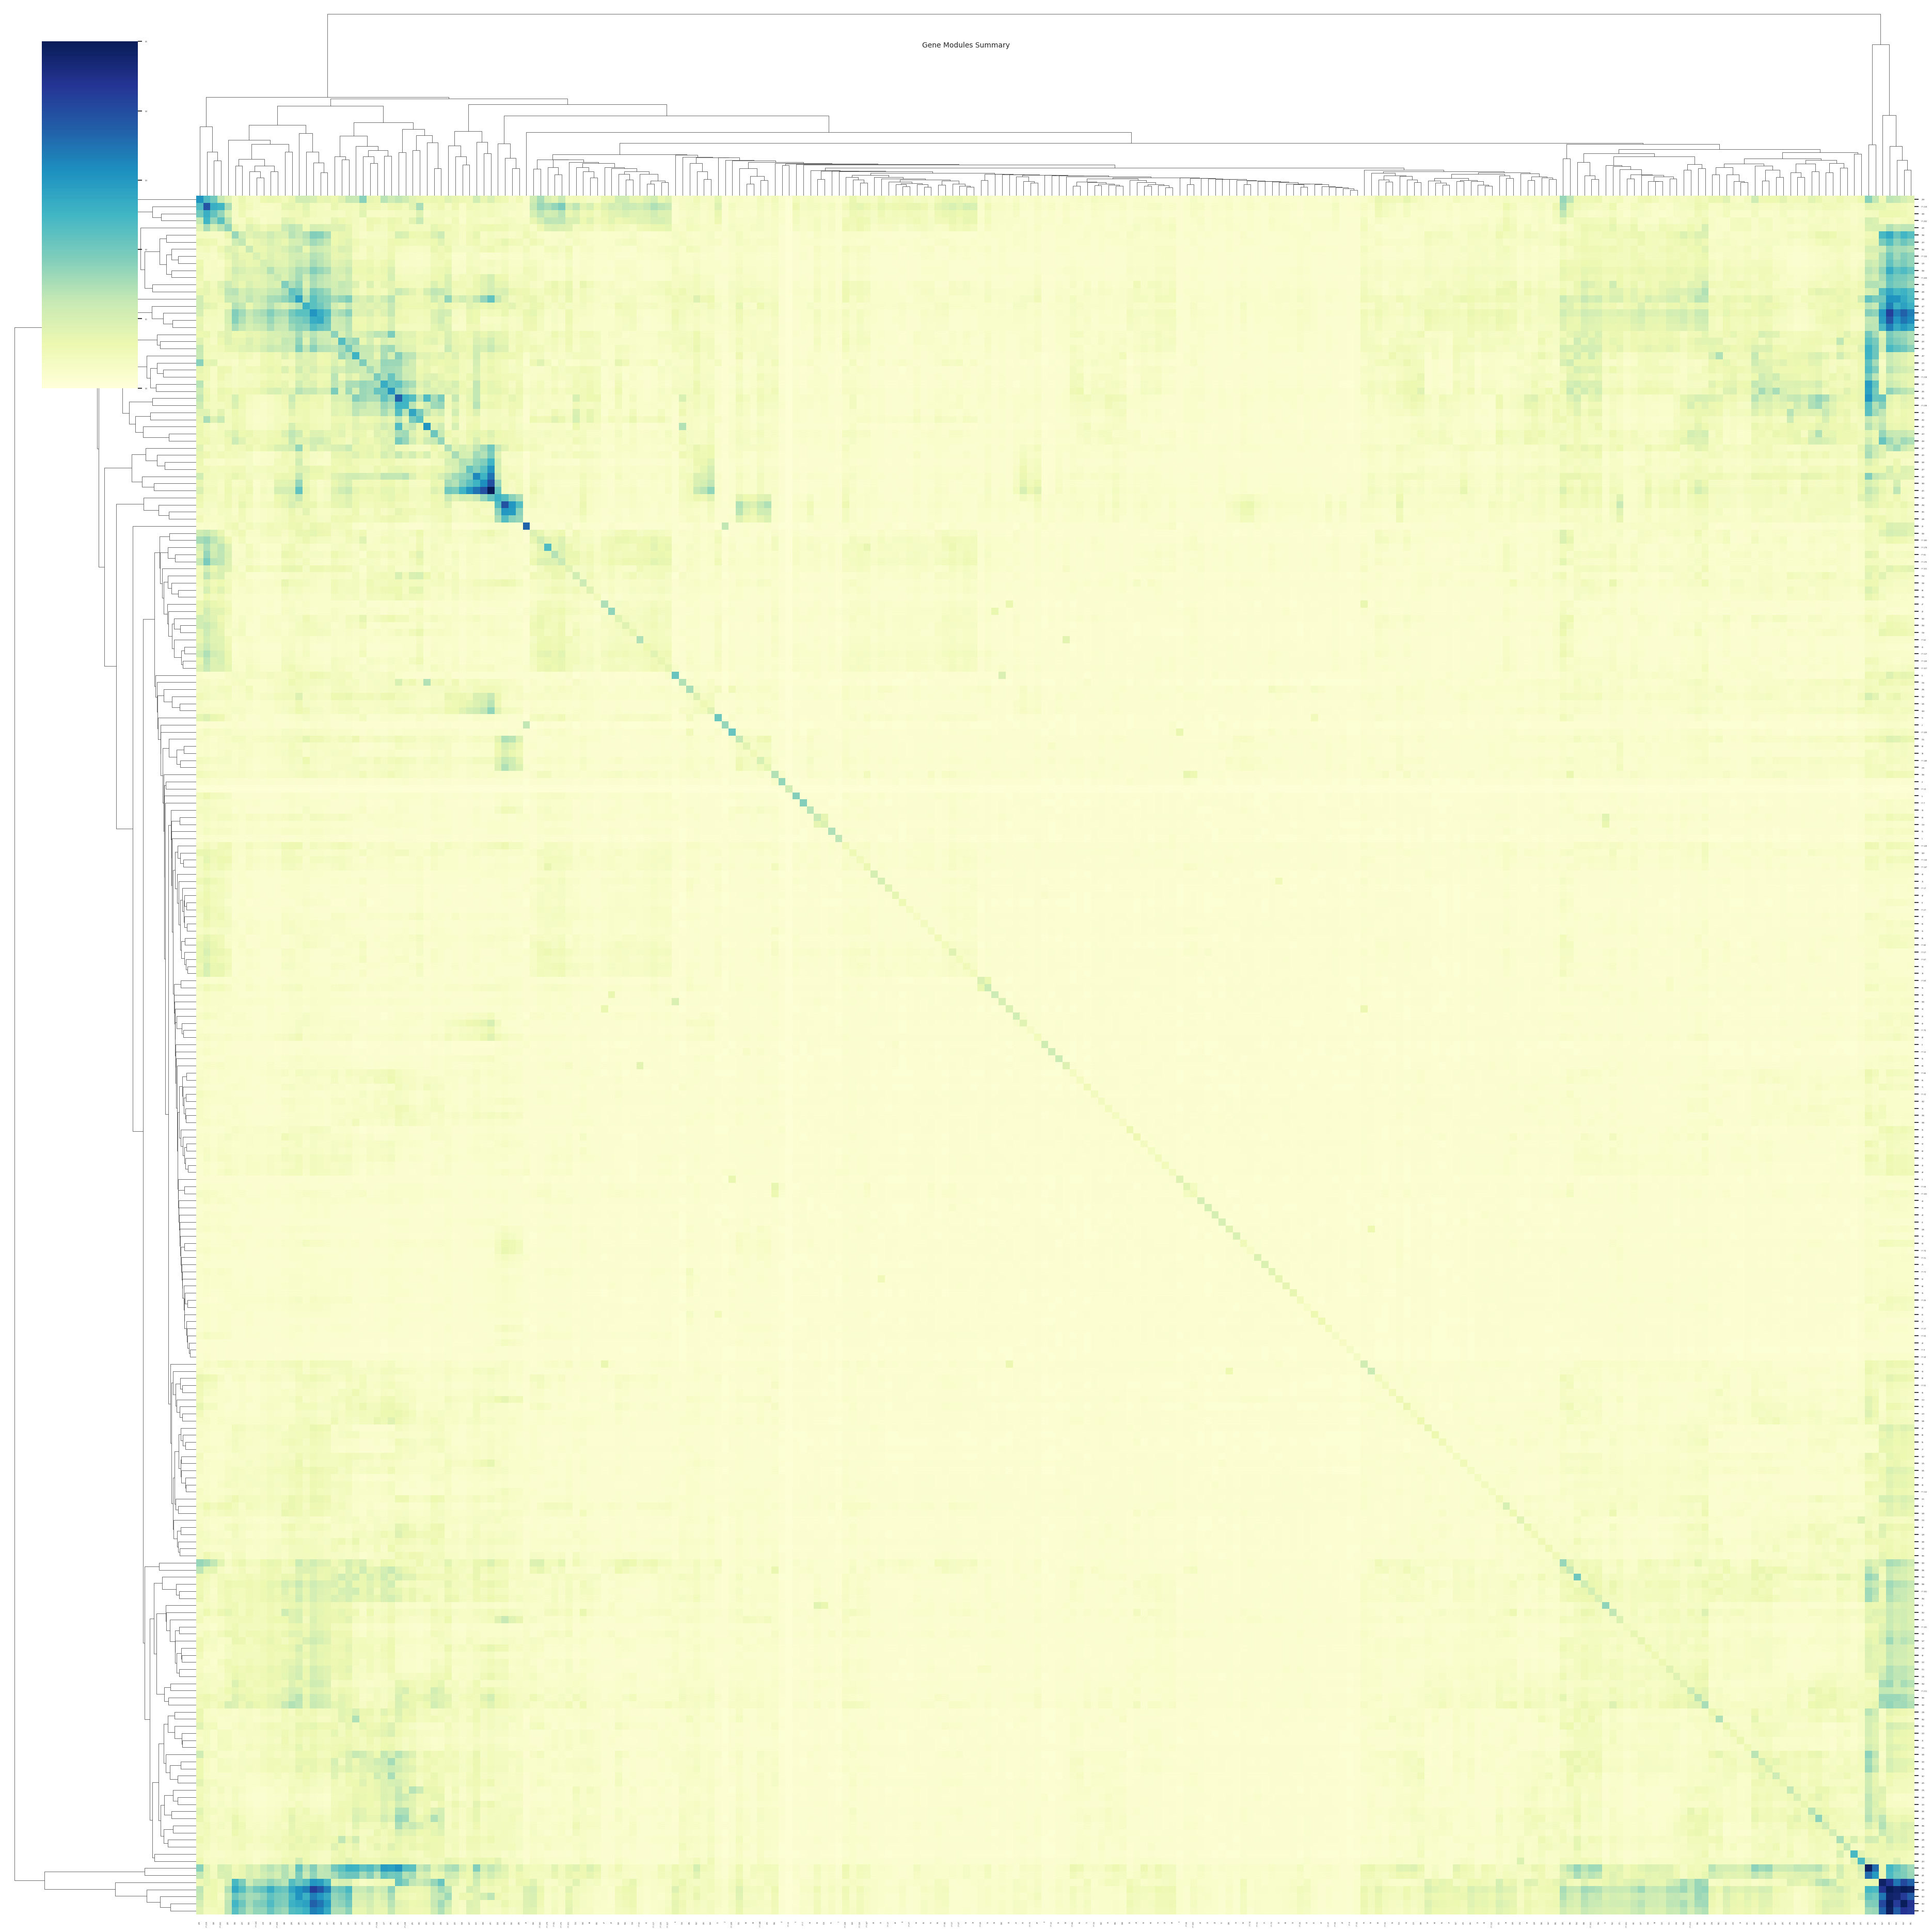

In [25]:
size = similarity_of_modules.shape[0]
if size > 50:
    sb.set(font_scale=50 / size)
size = size * 0.15 + 1
cm = sb.clustermap(
    similarity_of_modules,
    figsize=(size, size),
    vmin=0,
    vmax=0.5,
    xticklabels=True,
    yticklabels=True,
    dendrogram_ratio=0.1,
    cmap="YlGnBu",
)
cm.fig.suptitle("Gene Modules Summary", fontsize=10)

plt.show()

<Figure size 310x310 with 0 Axes>

<Figure size 295x295 with 0 Axes>

<Figure size 265x265 with 0 Axes>

<Figure size 385x385 with 0 Axes>

<Figure size 235x235 with 0 Axes>

<Figure size 220x220 with 0 Axes>

<Figure size 235x235 with 0 Axes>

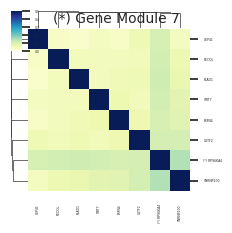

<Figure size 475x475 with 0 Axes>

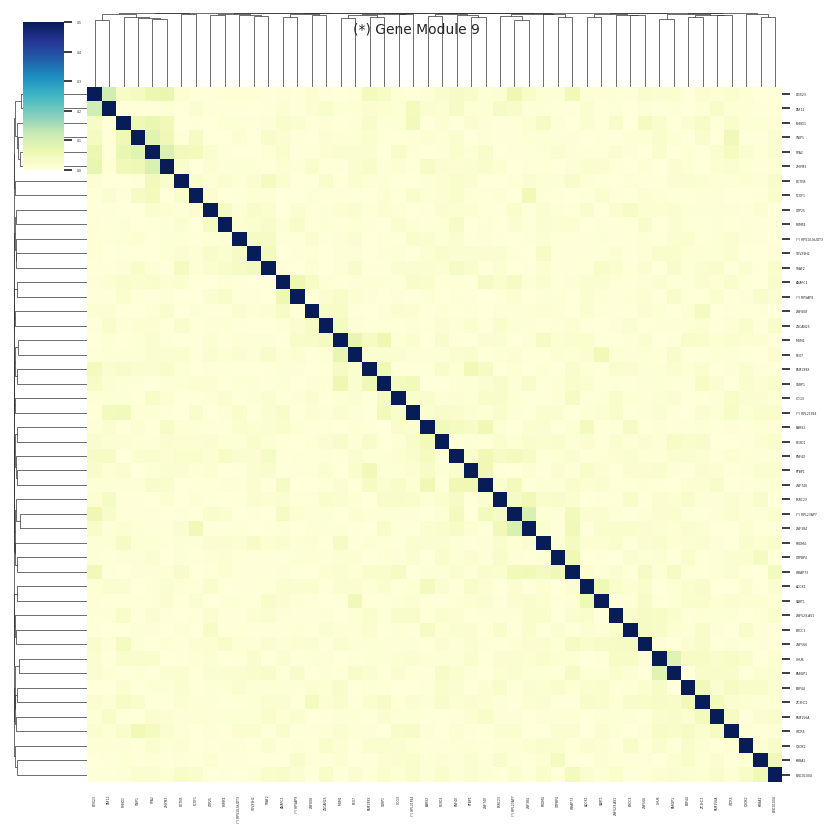

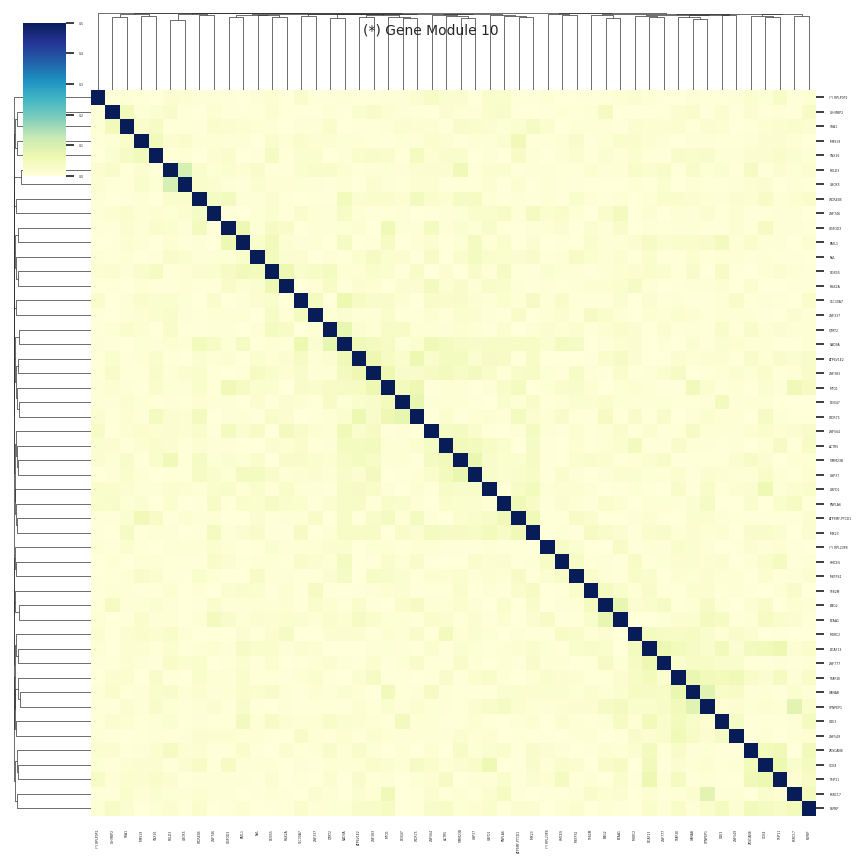

<Figure size 205x205 with 0 Axes>

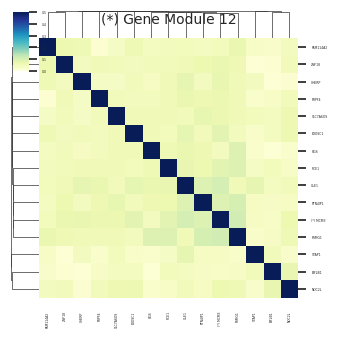

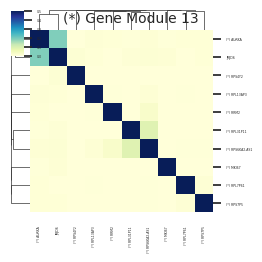

<Figure size 430x430 with 0 Axes>

<Figure size 310x310 with 0 Axes>

<Figure size 415x415 with 0 Axes>

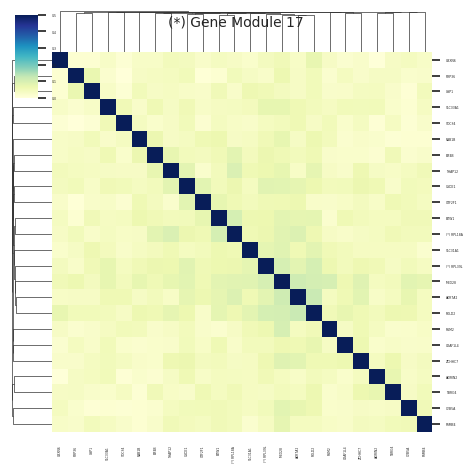

<Figure size 445x445 with 0 Axes>

<Figure size 265x265 with 0 Axes>

<Figure size 460x460 with 0 Axes>

<Figure size 310x310 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 175x175 with 0 Axes>

<Figure size 505x505 with 0 Axes>

<Figure size 505x505 with 0 Axes>

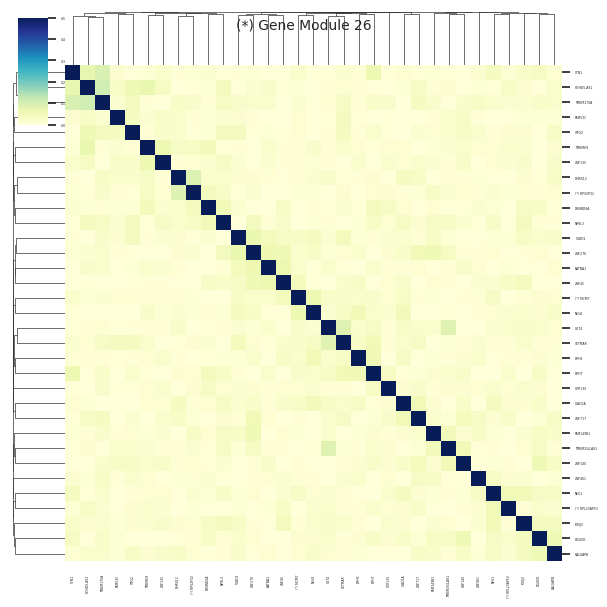

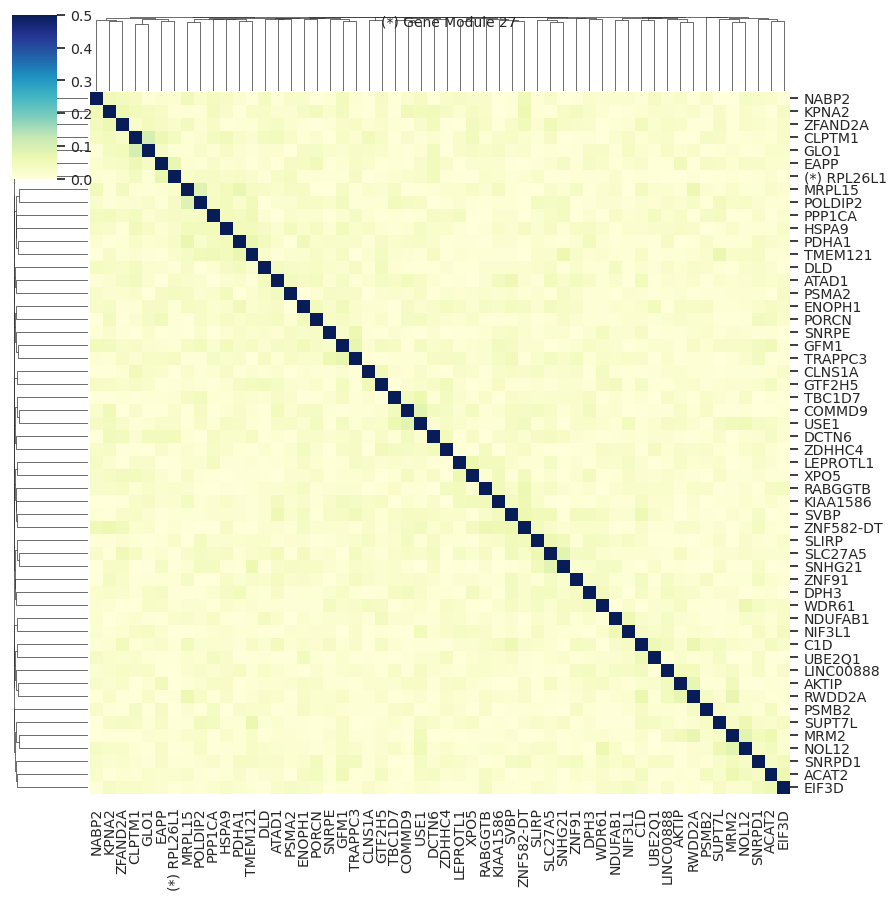

<Figure size 910x910 with 0 Axes>

<Figure size 520x520 with 0 Axes>

<Figure size 370x370 with 0 Axes>

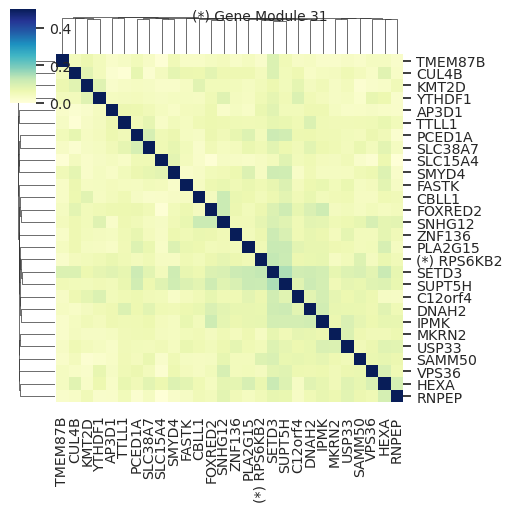

<Figure size 640x640 with 0 Axes>

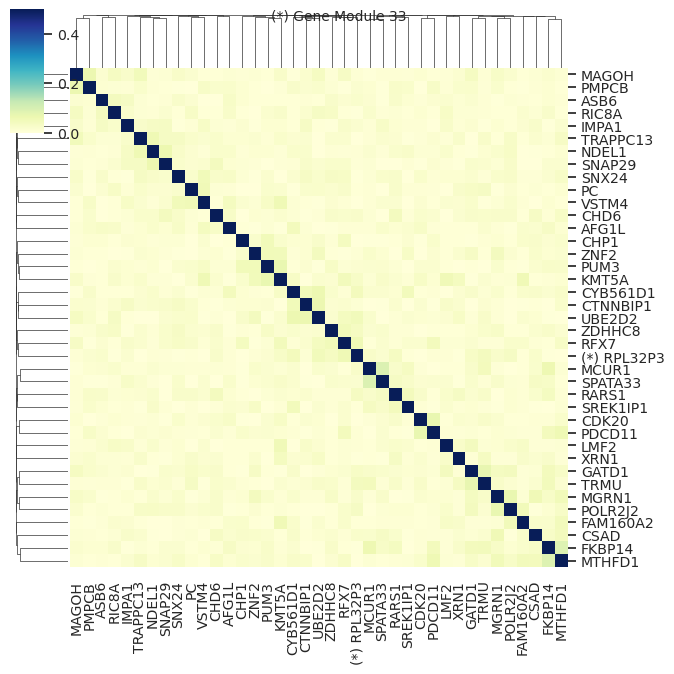

<Figure size 655x655 with 0 Axes>

<Figure size 730x730 with 0 Axes>

<Figure size 595x595 with 0 Axes>

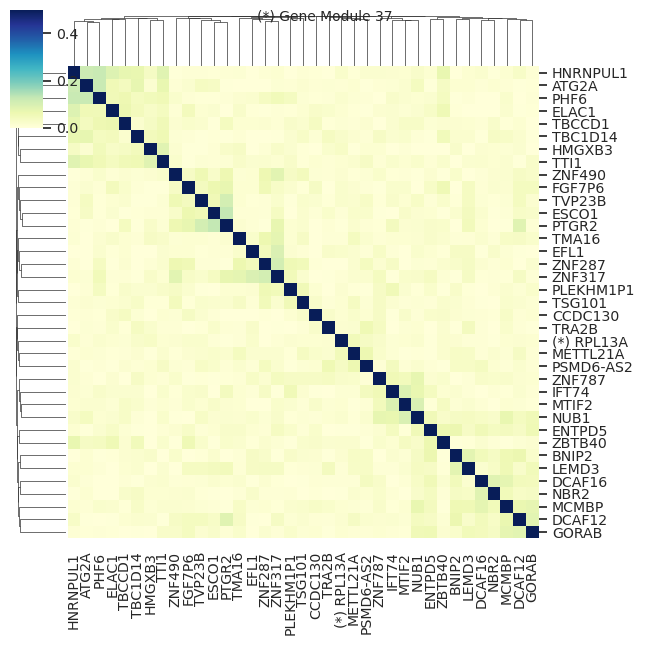

<Figure size 700x700 with 0 Axes>

<Figure size 325x325 with 0 Axes>

<Figure size 1045x1045 with 0 Axes>

<Figure size 520x520 with 0 Axes>

<Figure size 415x415 with 0 Axes>

<Figure size 415x415 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 865x865 with 0 Axes>

<Figure size 370x370 with 0 Axes>

<Figure size 325x325 with 0 Axes>

<Figure size 475x475 with 0 Axes>

<Figure size 715x715 with 0 Axes>

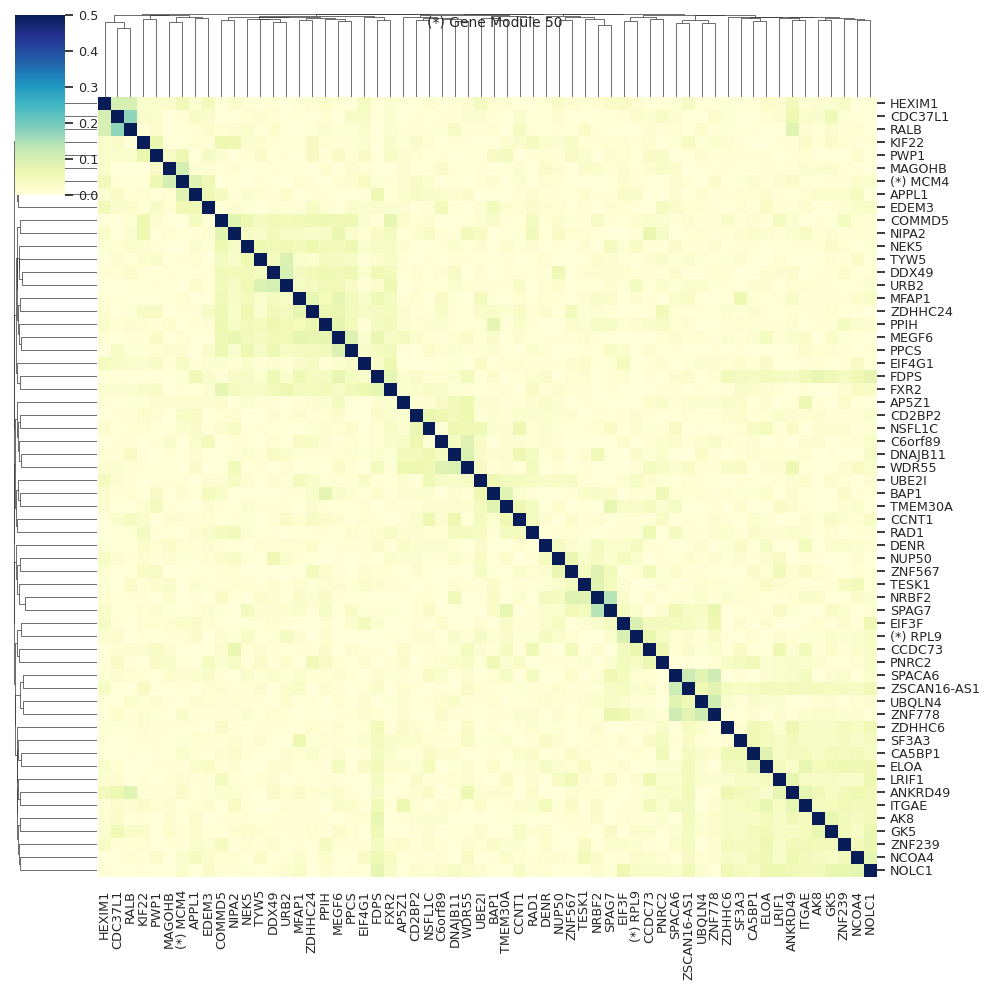

<Figure size 310x310 with 0 Axes>

<Figure size 775x775 with 0 Axes>

<Figure size 715x715 with 0 Axes>

<Figure size 505x505 with 0 Axes>

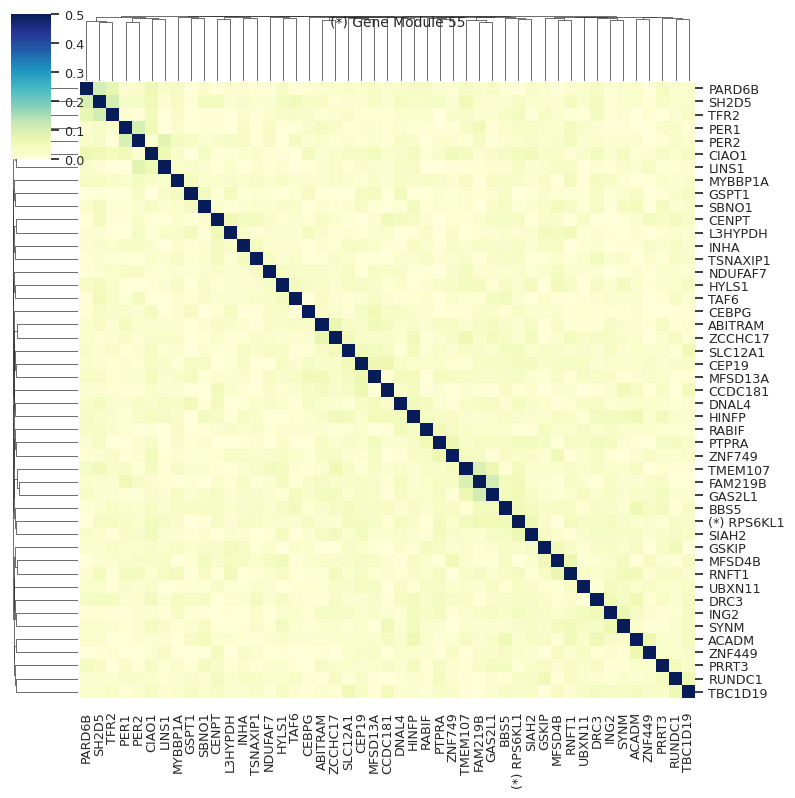

<Figure size 625x625 with 0 Axes>

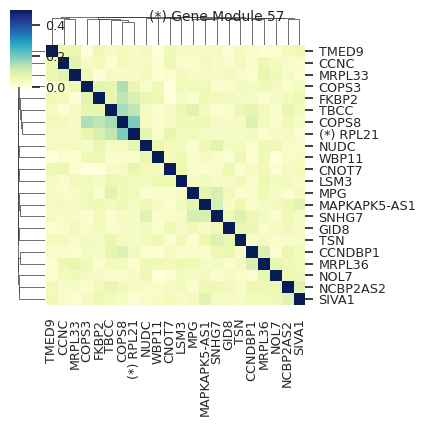

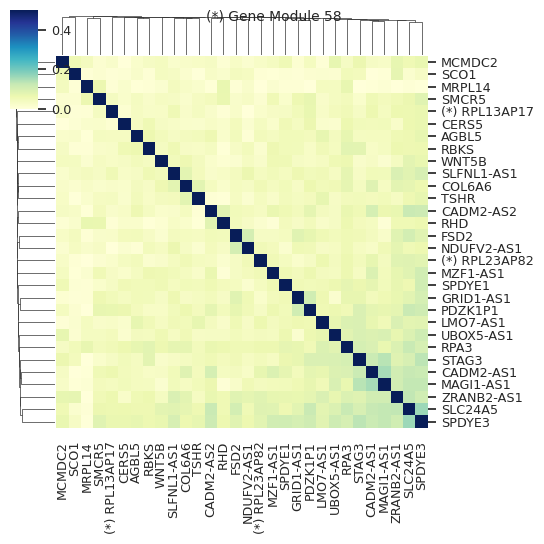

<Figure size 865x865 with 0 Axes>

<Figure size 475x475 with 0 Axes>

<Figure size 820x820 with 0 Axes>

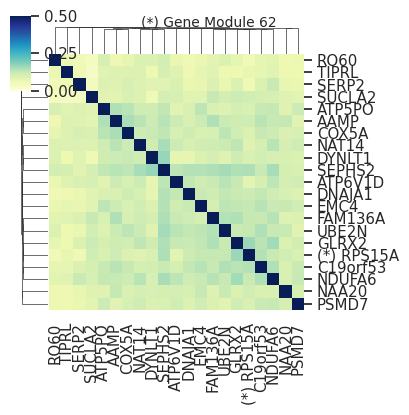

<Figure size 565x565 with 0 Axes>

<Figure size 880x880 with 0 Axes>

<Figure size 580x580 with 0 Axes>

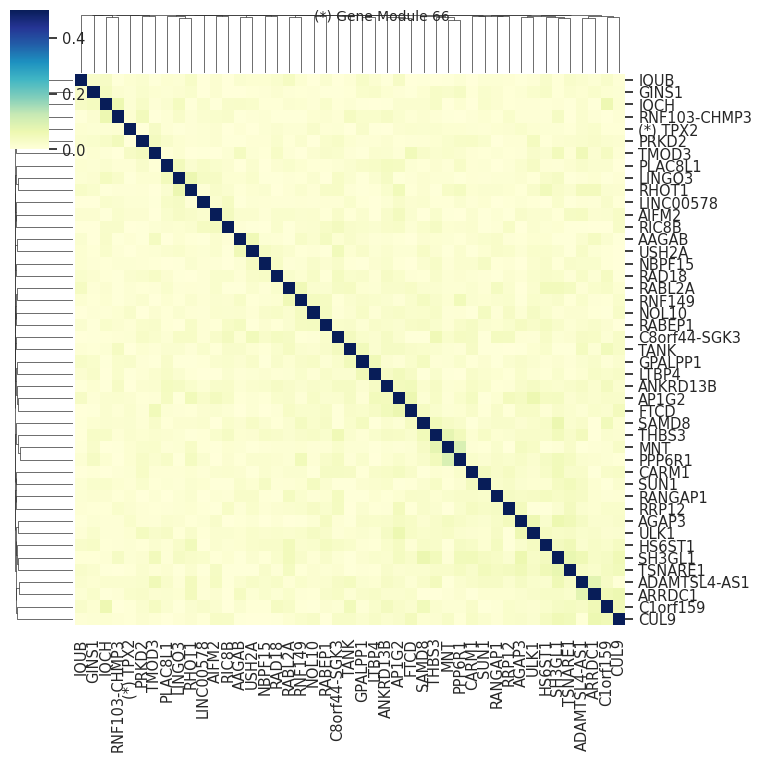

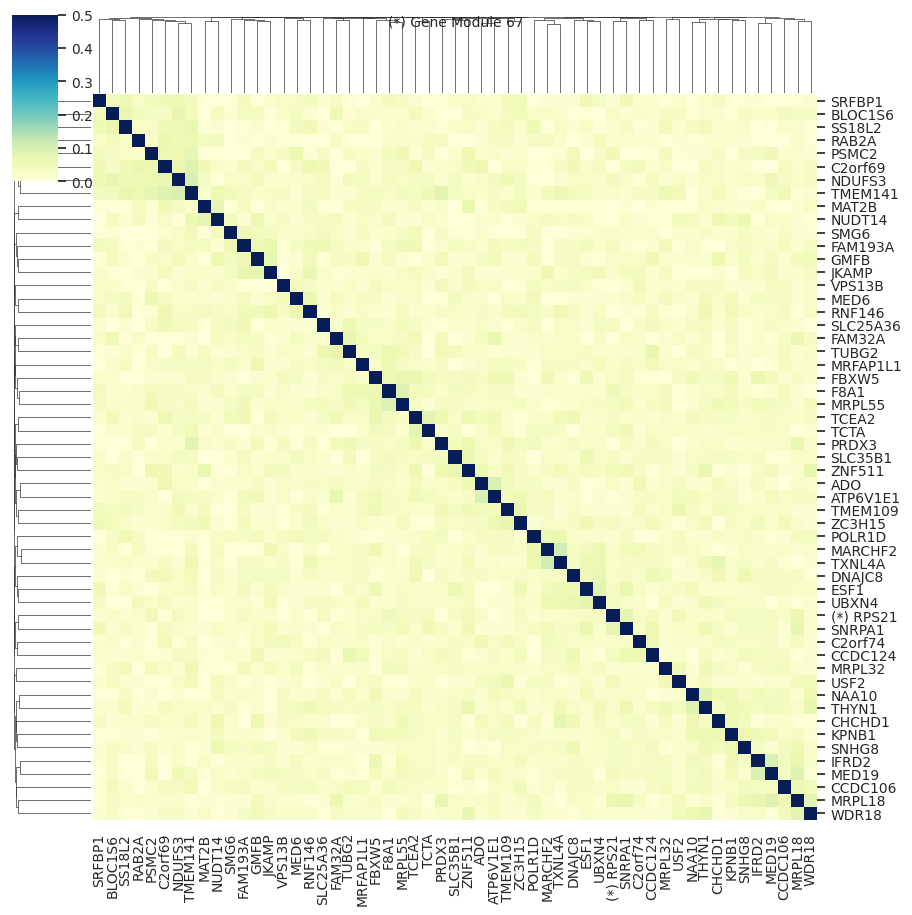

<Figure size 835x835 with 0 Axes>

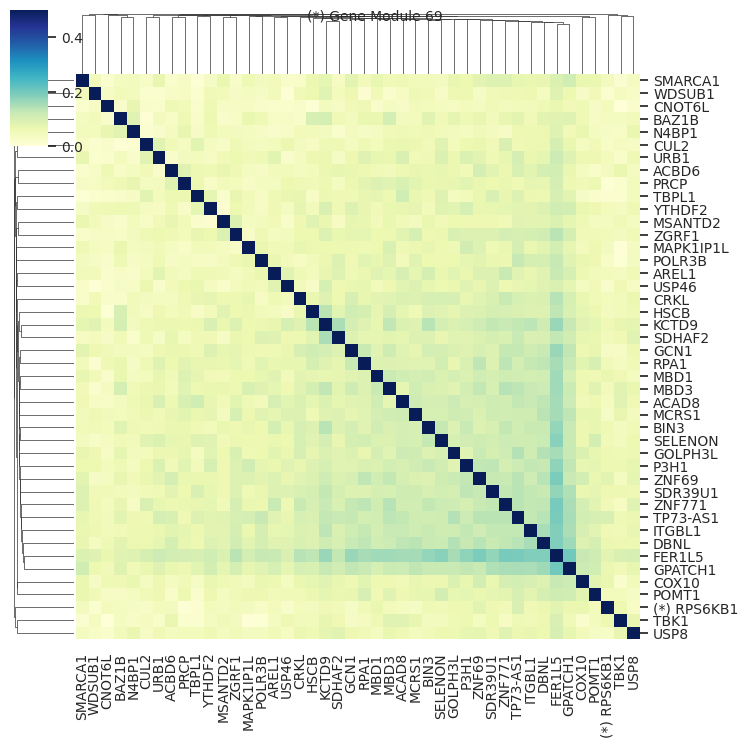

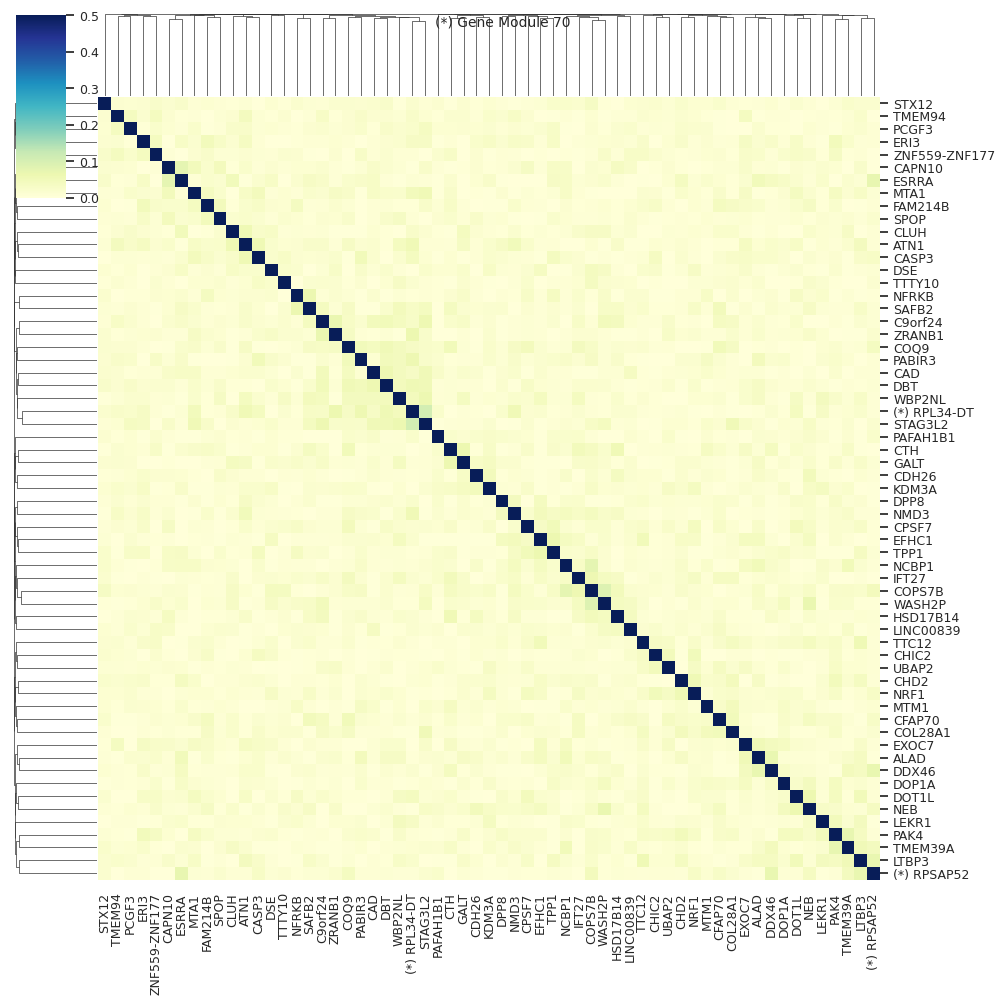

<Figure size 265x265 with 0 Axes>

<Figure size 880x880 with 0 Axes>

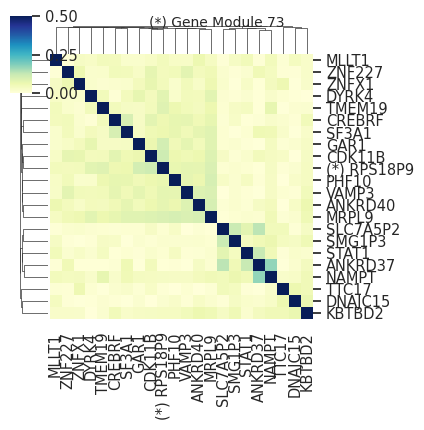

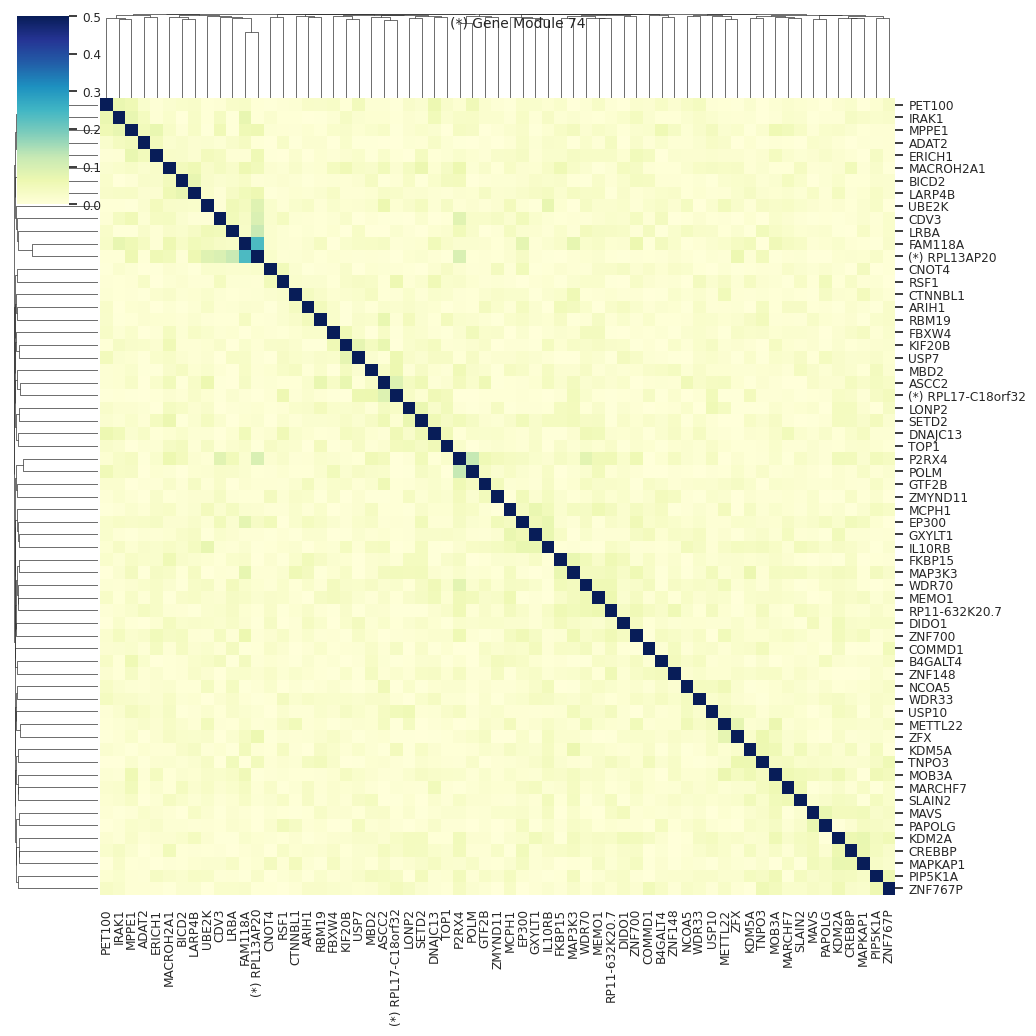

<Figure size 490x490 with 0 Axes>

<Figure size 460x460 with 0 Axes>

<Figure size 715x715 with 0 Axes>

<Figure size 505x505 with 0 Axes>

<Figure size 850x850 with 0 Axes>

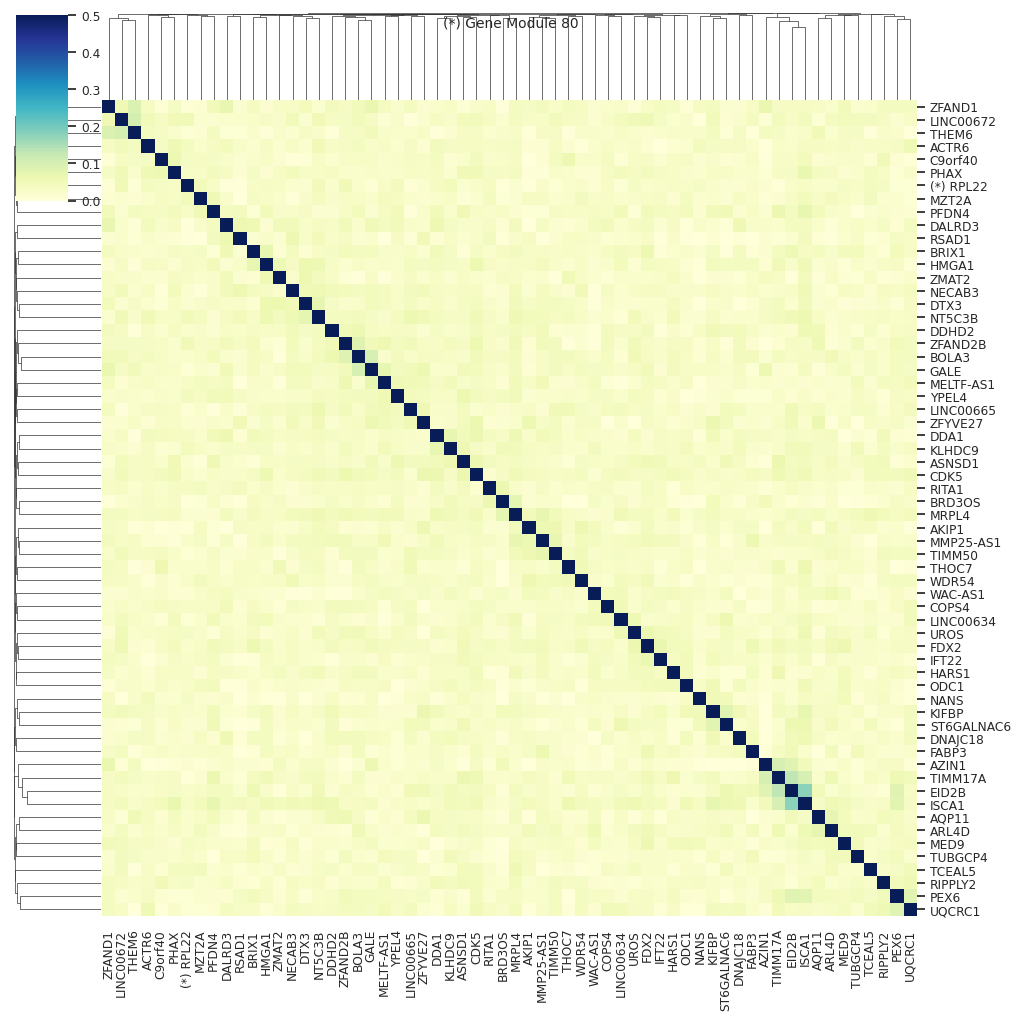

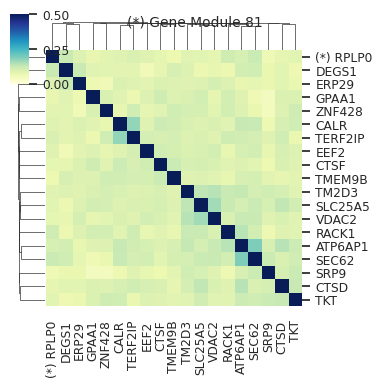

<Figure size 730x730 with 0 Axes>

<Figure size 505x505 with 0 Axes>

<Figure size 1060x1060 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 835x835 with 0 Axes>

<Figure size 745x745 with 0 Axes>

<Figure size 430x430 with 0 Axes>

<Figure size 460x460 with 0 Axes>

<Figure size 475x475 with 0 Axes>

<Figure size 880x880 with 0 Axes>

<Figure size 1030x1030 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 790x790 with 0 Axes>

<Figure size 550x550 with 0 Axes>

<Figure size 415x415 with 0 Axes>

<Figure size 595x595 with 0 Axes>

<Figure size 385x385 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 940x940 with 0 Axes>

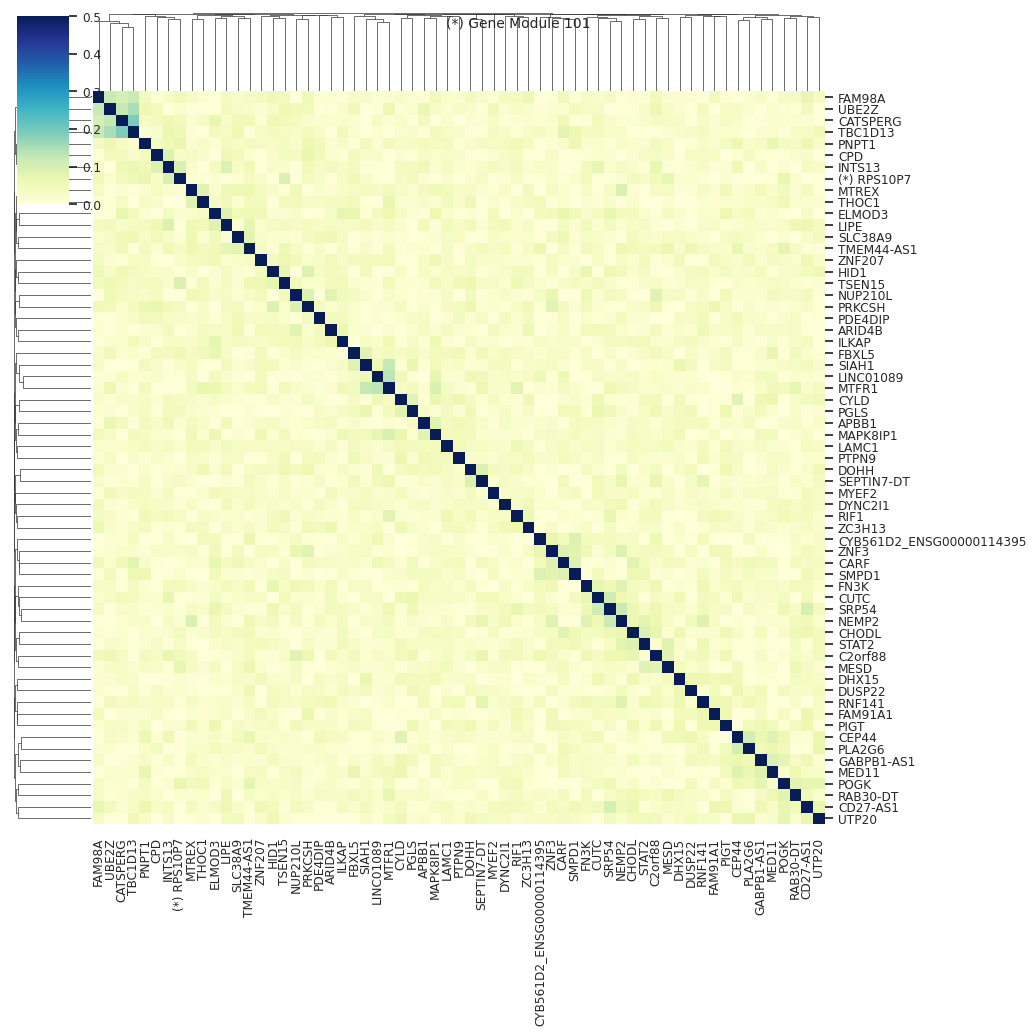

<Figure size 730x730 with 0 Axes>

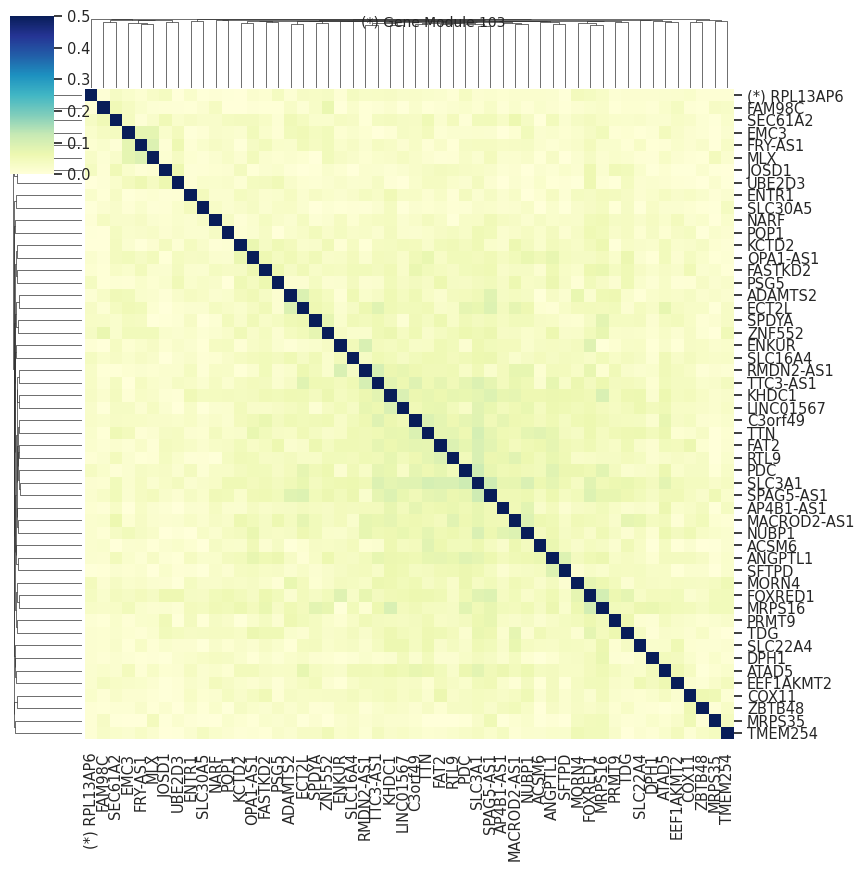

<Figure size 490x490 with 0 Axes>

<Figure size 760x760 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 940x940 with 0 Axes>

<Figure size 865x865 with 0 Axes>

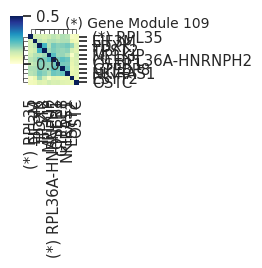

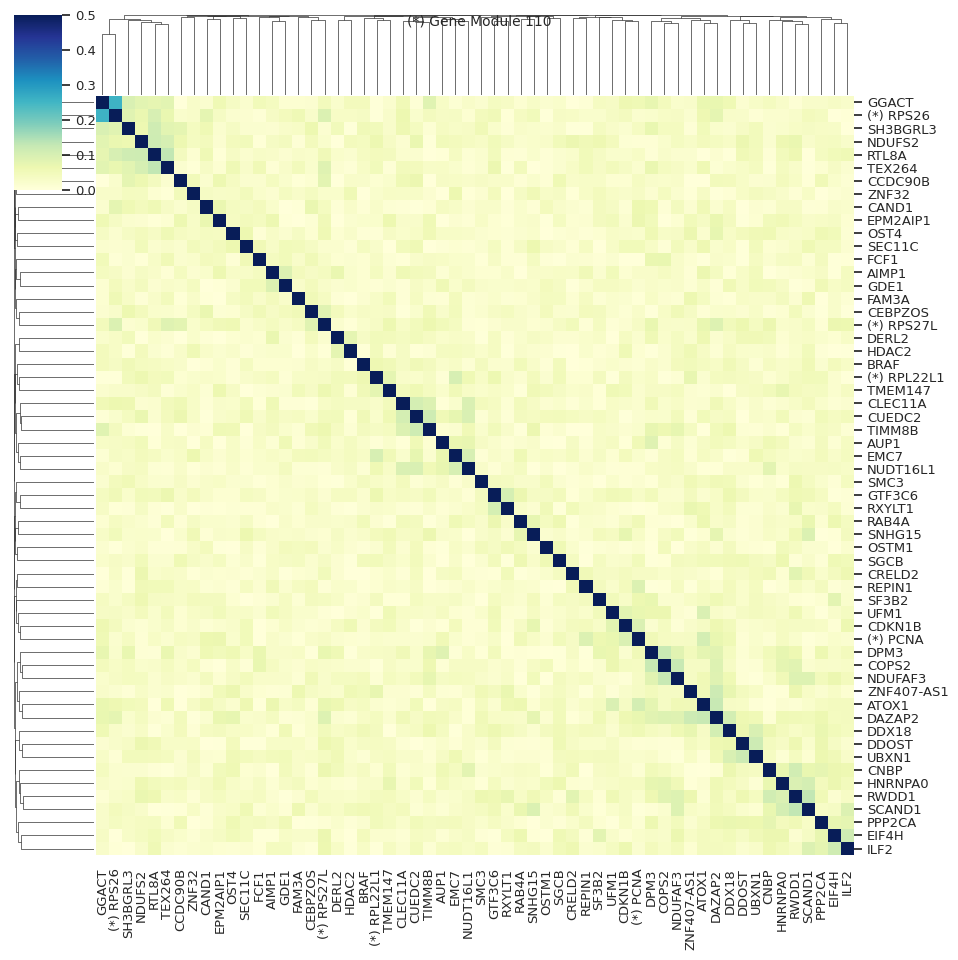

<Figure size 505x505 with 0 Axes>

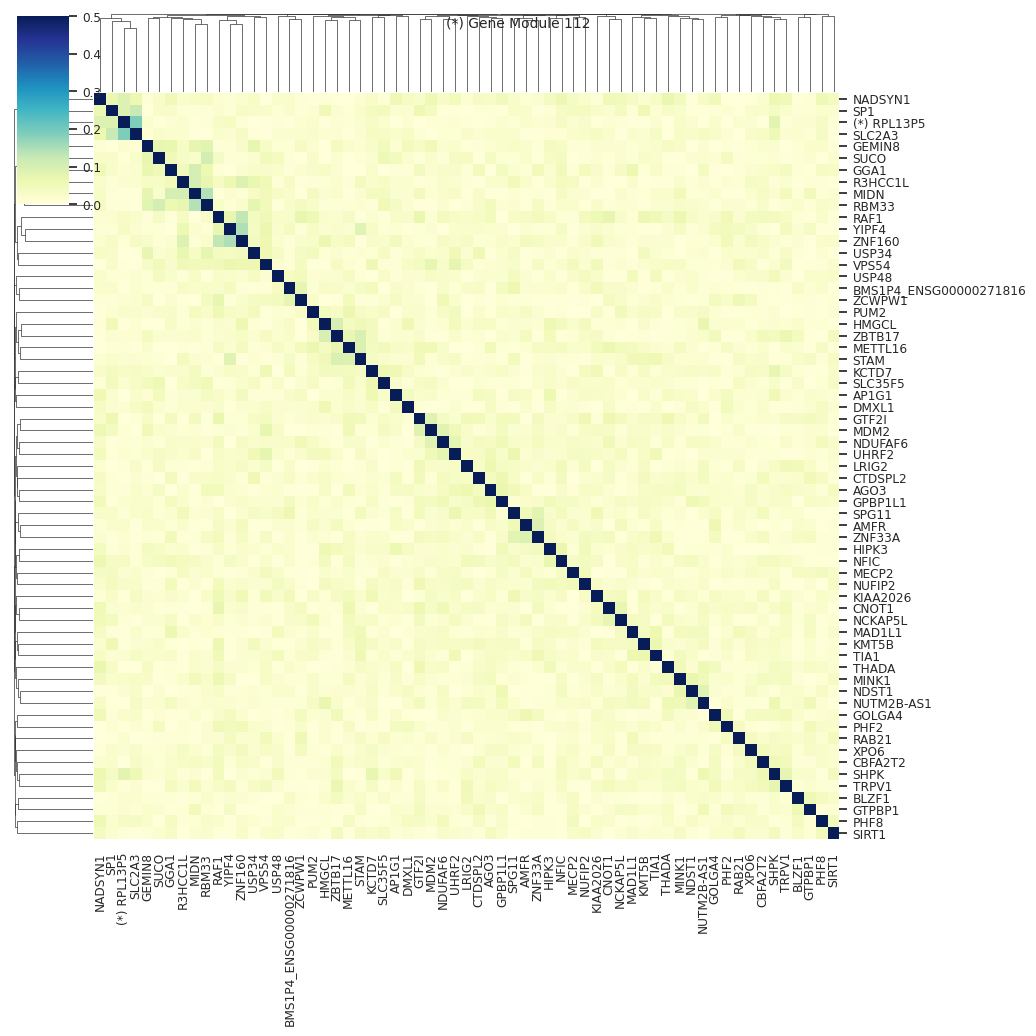

<Figure size 730x730 with 0 Axes>

<Figure size 475x475 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 415x415 with 0 Axes>

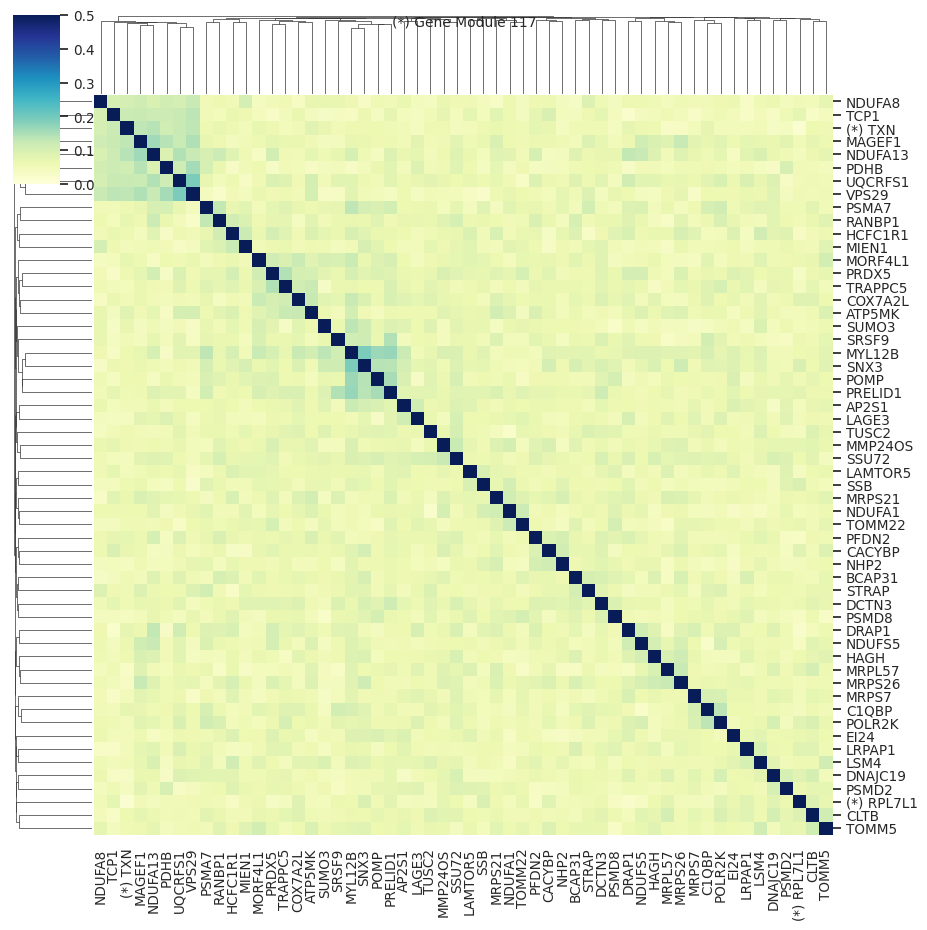

<Figure size 685x685 with 0 Axes>

<Figure size 1015x1015 with 0 Axes>

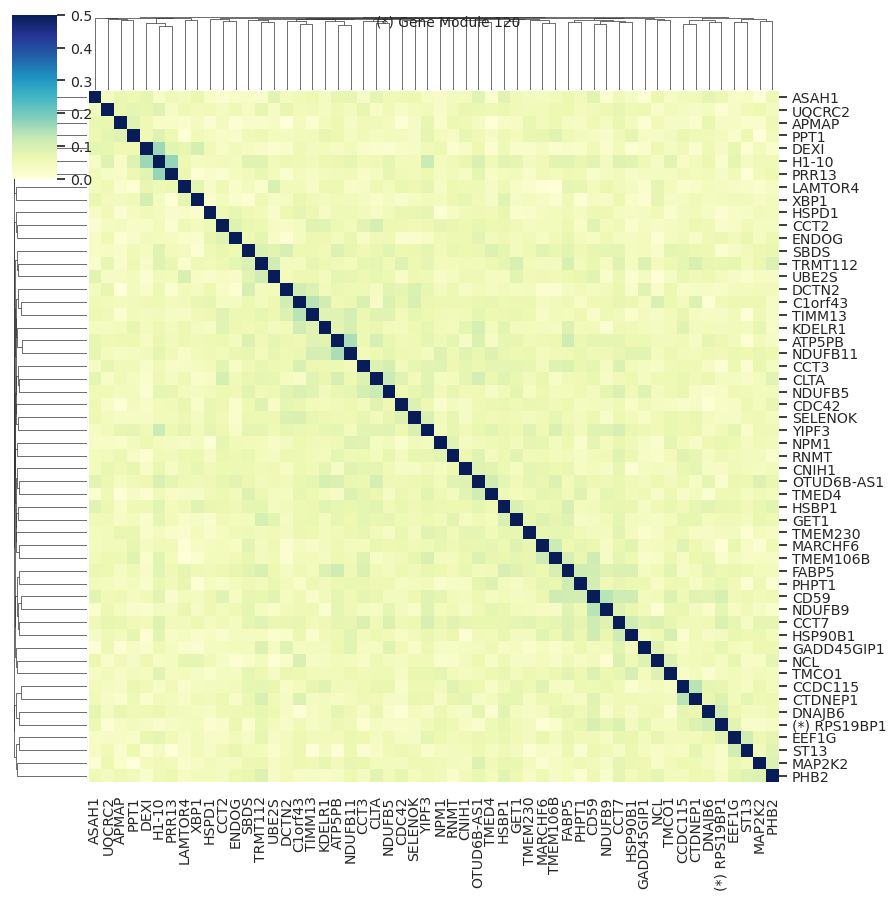

<Figure size 745x745 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 1045x1045 with 0 Axes>

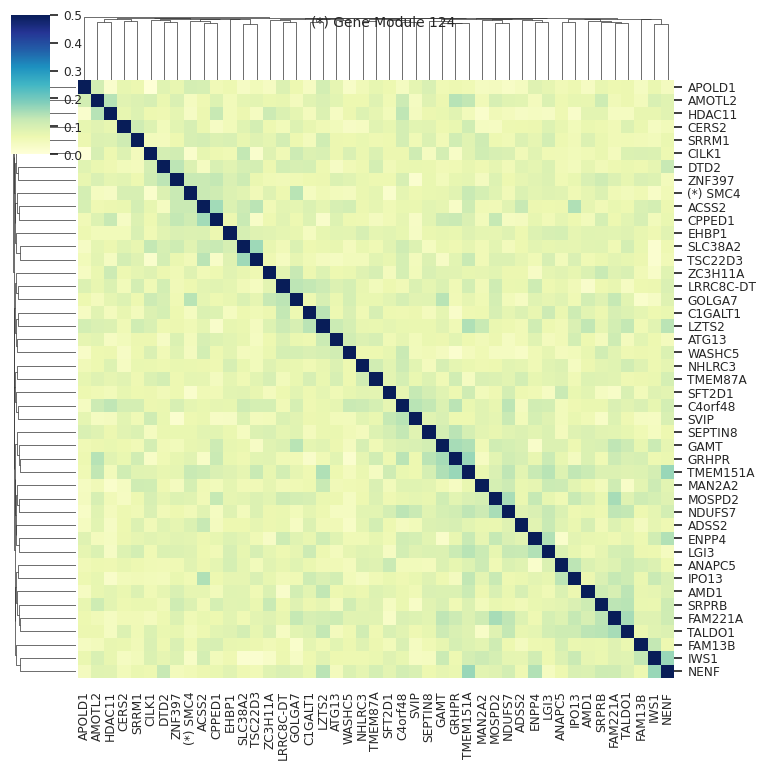

<Figure size 640x640 with 0 Axes>

<Figure size 550x550 with 0 Axes>

<Figure size 340x340 with 0 Axes>

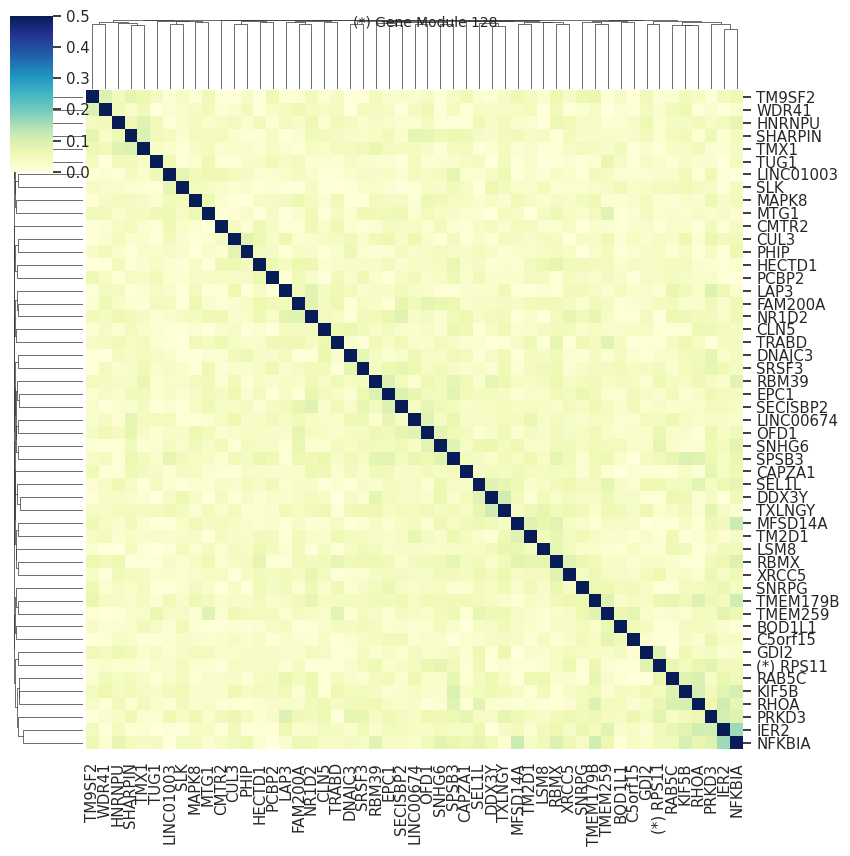

<Figure size 730x730 with 0 Axes>

<Figure size 490x490 with 0 Axes>

<Figure size 745x745 with 0 Axes>

<Figure size 655x655 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 850x850 with 0 Axes>

<Figure size 880x880 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 790x790 with 0 Axes>

<Figure size 340x340 with 0 Axes>

<Figure size 820x820 with 0 Axes>

<Figure size 460x460 with 0 Axes>

<Figure size 715x715 with 0 Axes>

<Figure size 580x580 with 0 Axes>

<Figure size 790x790 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 1060x1060 with 0 Axes>

<Figure size 625x625 with 0 Axes>

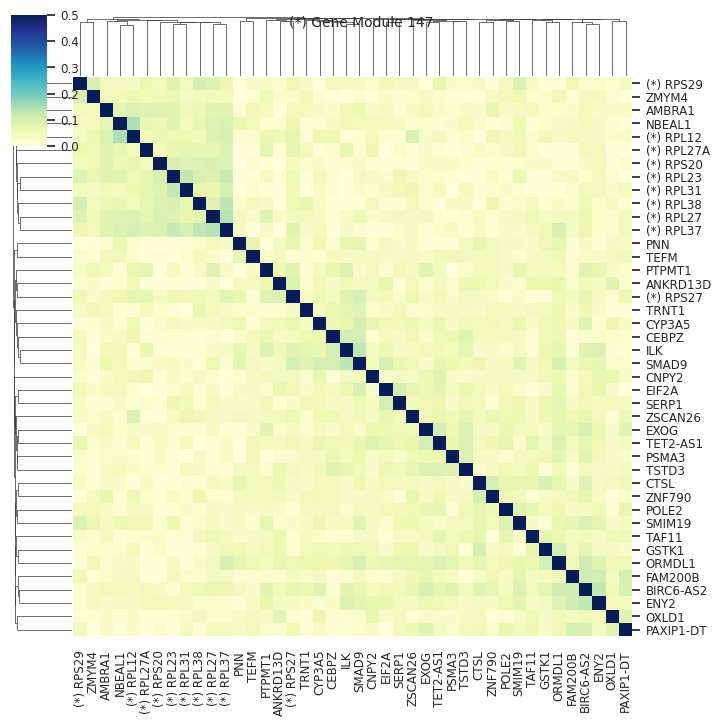

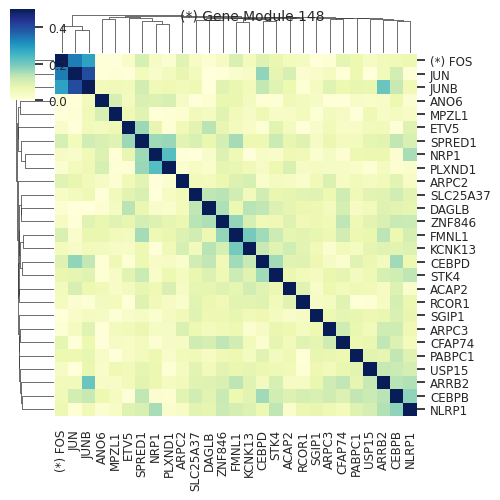

<Figure size 865x865 with 0 Axes>

<Figure size 700x700 with 0 Axes>

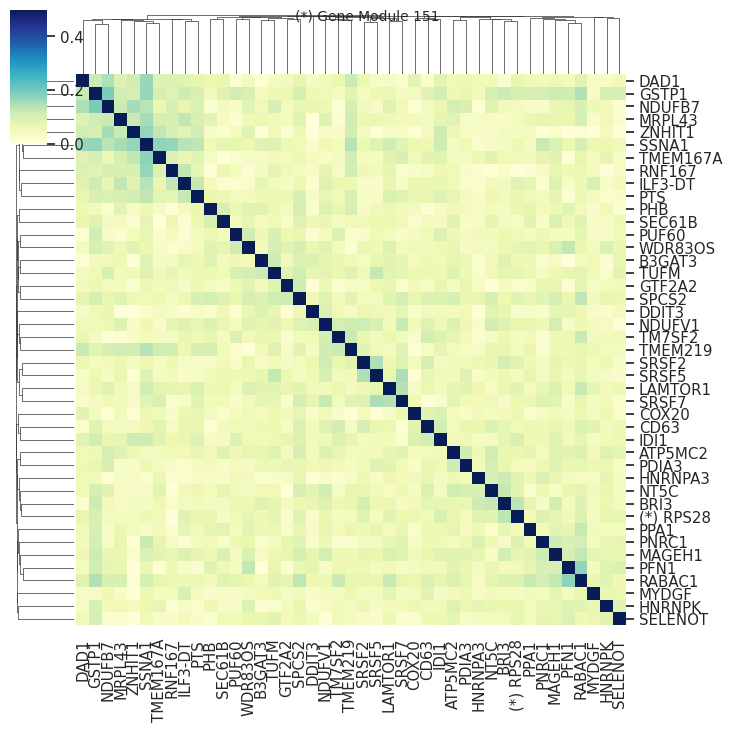

<Figure size 505x505 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 325x325 with 0 Axes>

<Figure size 925x925 with 0 Axes>

<Figure size 760x760 with 0 Axes>

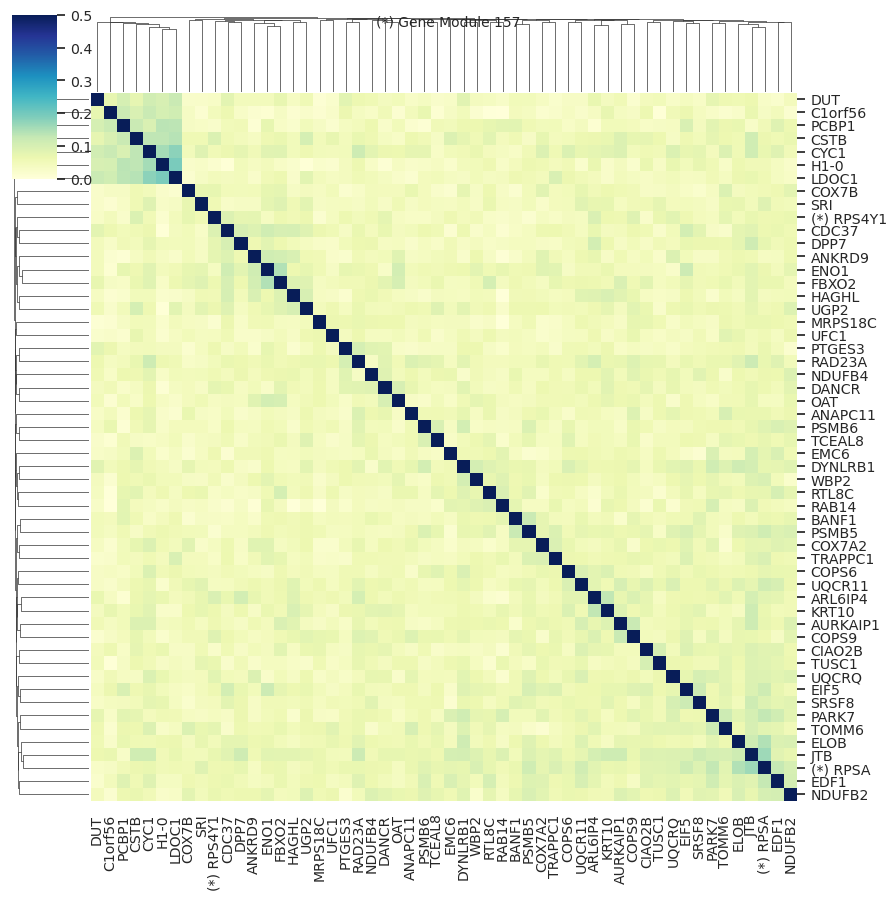

<Figure size 700x700 with 0 Axes>

<Figure size 805x805 with 0 Axes>

<Figure size 460x460 with 0 Axes>

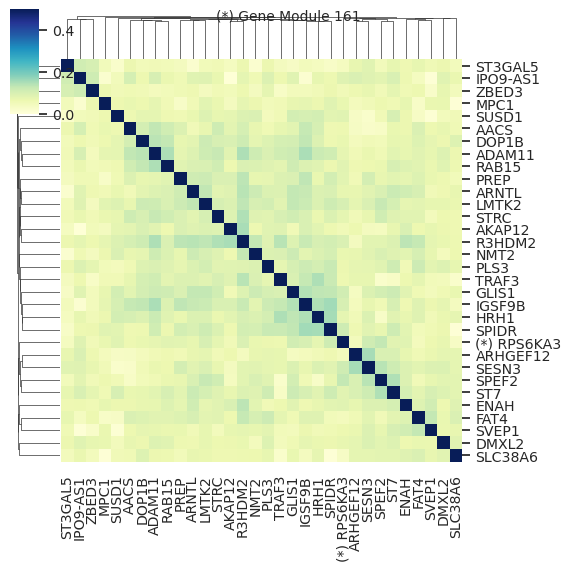

<Figure size 430x430 with 0 Axes>

<Figure size 685x685 with 0 Axes>

<Figure size 835x835 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 670x670 with 0 Axes>

<Figure size 250x250 with 0 Axes>

<Figure size 880x880 with 0 Axes>

<Figure size 730x730 with 0 Axes>

<Figure size 925x925 with 0 Axes>

<Figure size 595x595 with 0 Axes>

<Figure size 985x985 with 0 Axes>

<Figure size 580x580 with 0 Axes>

<Figure size 520x520 with 0 Axes>

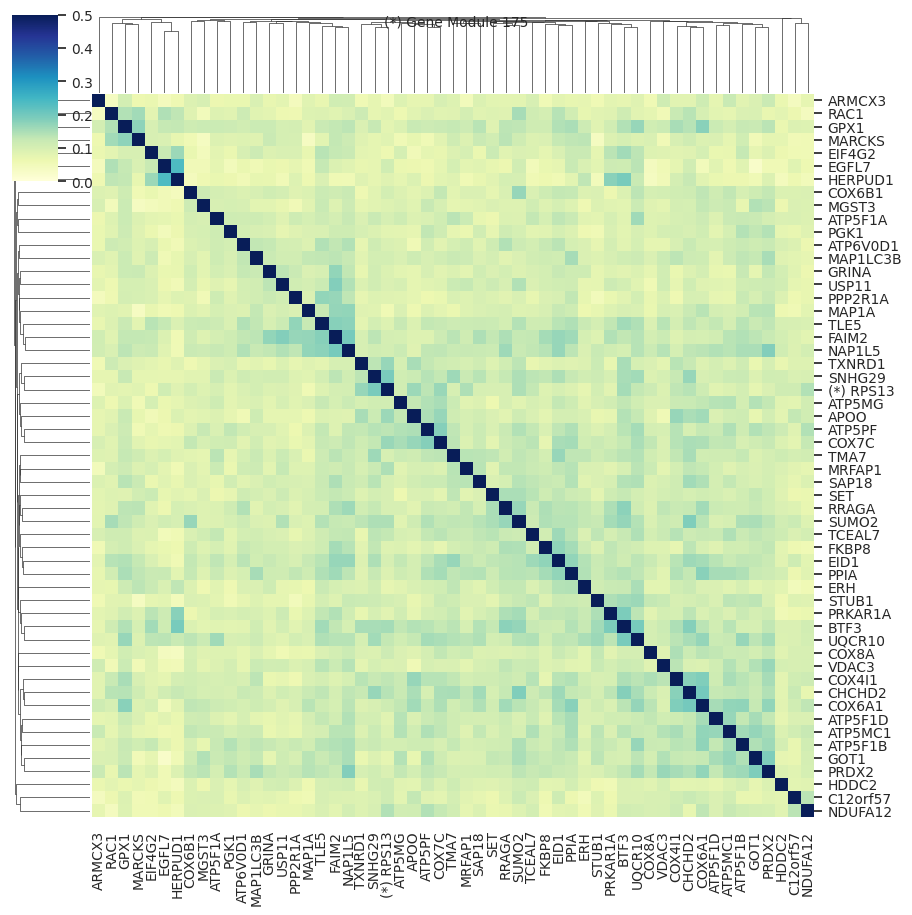

<Figure size 520x520 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 985x985 with 0 Axes>

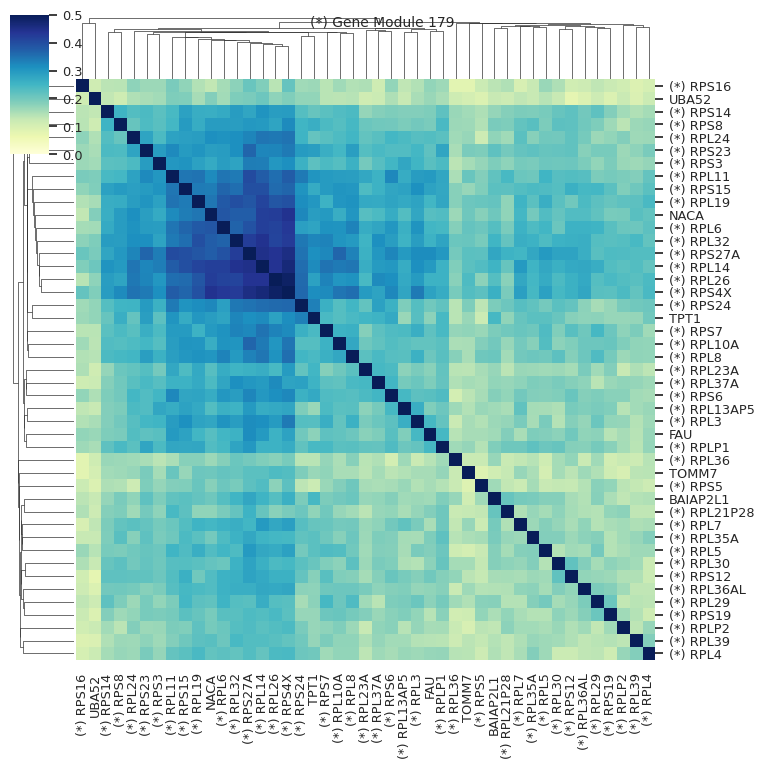

<Figure size 475x475 with 0 Axes>

<Figure size 625x625 with 0 Axes>

<Figure size 595x595 with 0 Axes>

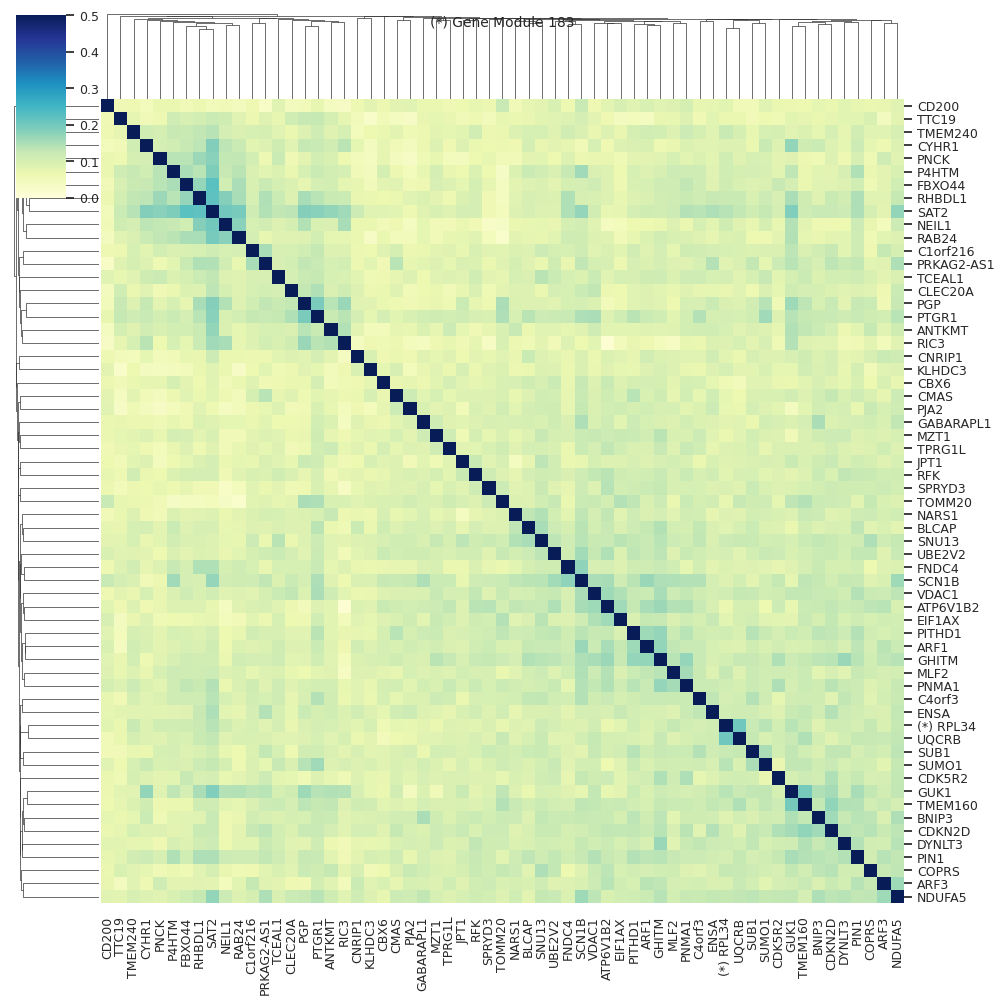

<Figure size 730x730 with 0 Axes>

<Figure size 895x895 with 0 Axes>

<Figure size 625x625 with 0 Axes>

<Figure size 820x820 with 0 Axes>

<Figure size 730x730 with 0 Axes>

<Figure size 730x730 with 0 Axes>

<Figure size 940x940 with 0 Axes>

<Figure size 760x760 with 0 Axes>

<Figure size 580x580 with 0 Axes>

<Figure size 475x475 with 0 Axes>

<Figure size 685x685 with 0 Axes>

<Figure size 655x655 with 0 Axes>

<Figure size 625x625 with 0 Axes>

<Figure size 670x670 with 0 Axes>

<Figure size 535x535 with 0 Axes>

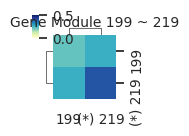

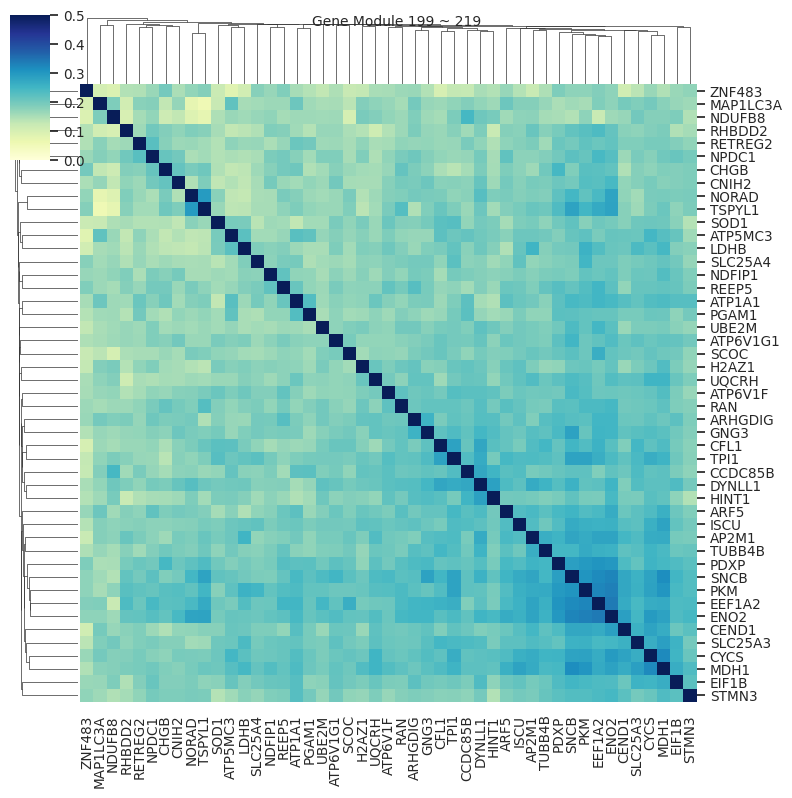

<Figure size 475x475 with 0 Axes>

<Figure size 595x595 with 0 Axes>

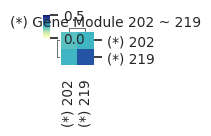

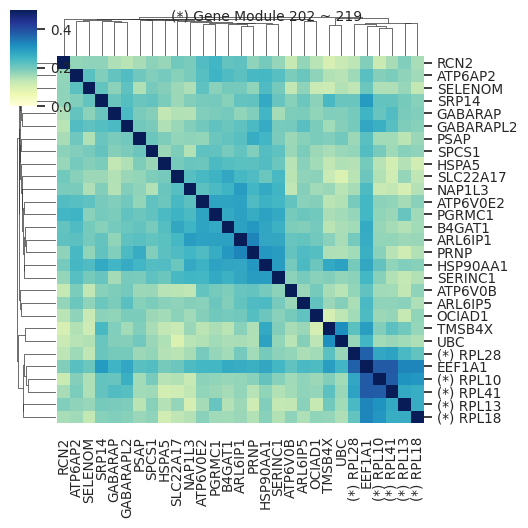

<Figure size 655x655 with 0 Axes>

<Figure size 850x850 with 0 Axes>

<Figure size 880x880 with 0 Axes>

<Figure size 820x820 with 0 Axes>

<Figure size 340x340 with 0 Axes>

<Figure size 835x835 with 0 Axes>

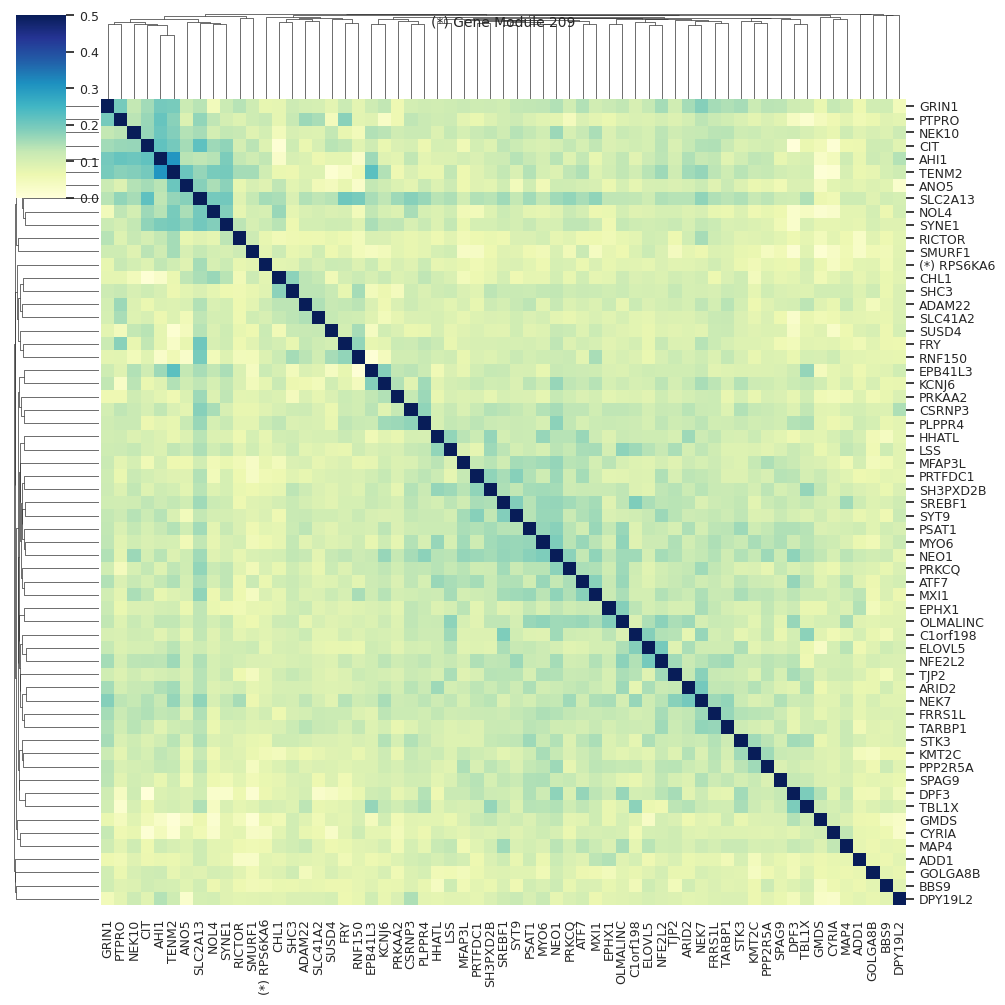

<Figure size 655x655 with 0 Axes>

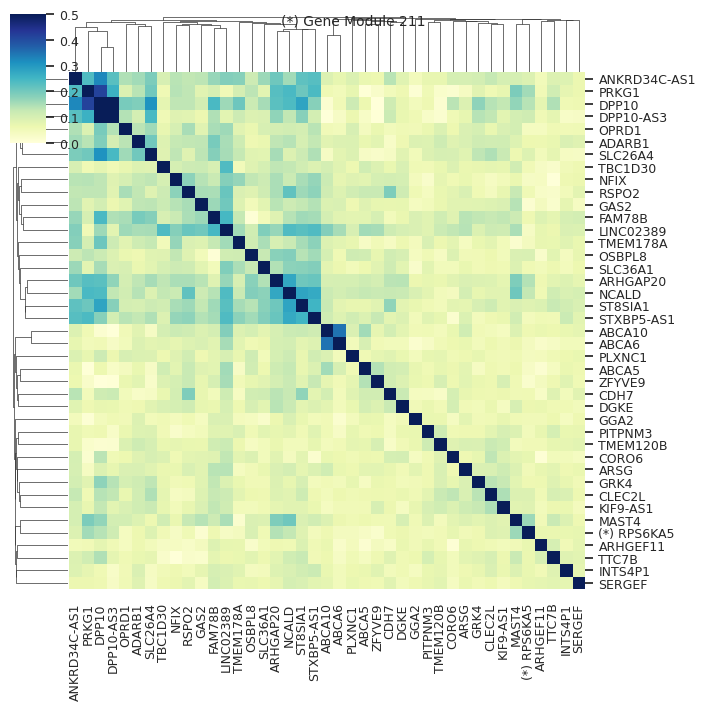

<Figure size 355x355 with 0 Axes>

<Figure size 535x535 with 0 Axes>

<Figure size 415x415 with 0 Axes>

<Figure size 640x640 with 0 Axes>

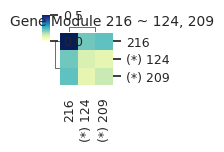

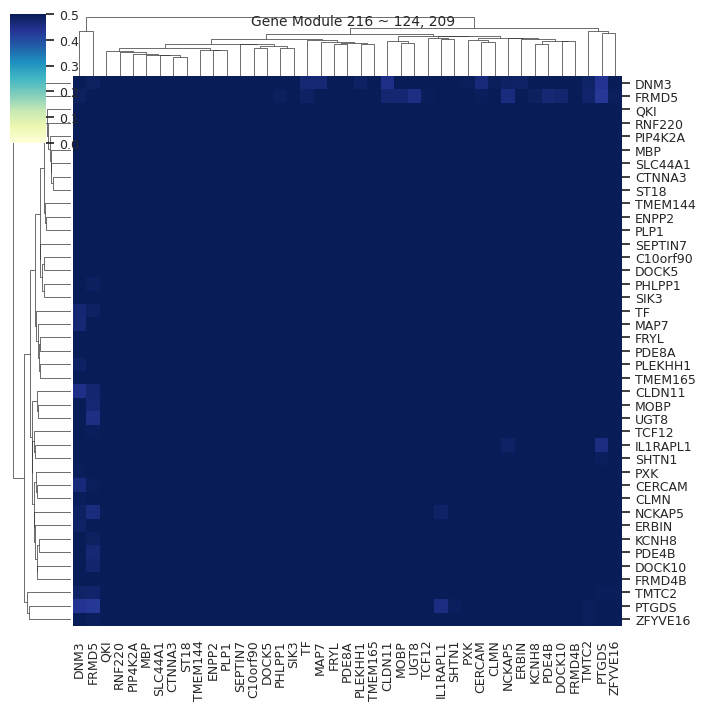

<Figure size 700x700 with 0 Axes>

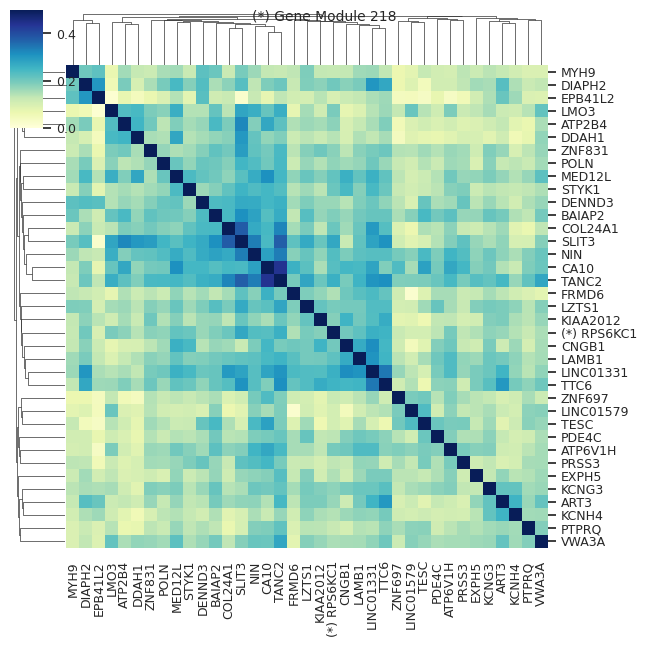

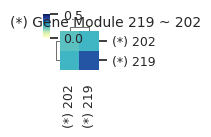

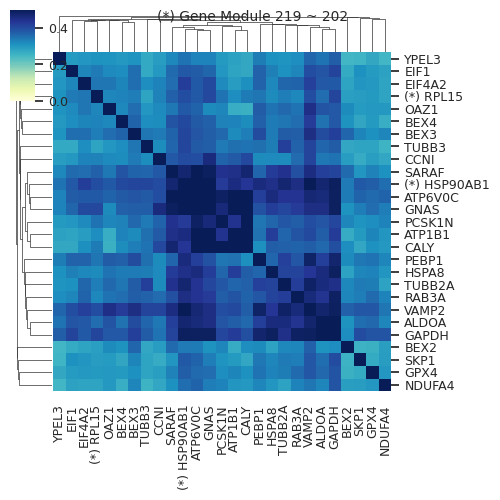

<Figure size 715x715 with 0 Axes>

<Figure size 550x550 with 0 Axes>

<Figure size 640x640 with 0 Axes>

<Figure size 820x820 with 0 Axes>

<Figure size 670x670 with 0 Axes>

<Figure size 1045x1045 with 0 Axes>

<Figure size 970x970 with 0 Axes>

<Figure size 835x835 with 0 Axes>

<Figure size 880x880 with 0 Axes>

<Figure size 790x790 with 0 Axes>

<Figure size 1030x1030 with 0 Axes>

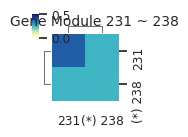

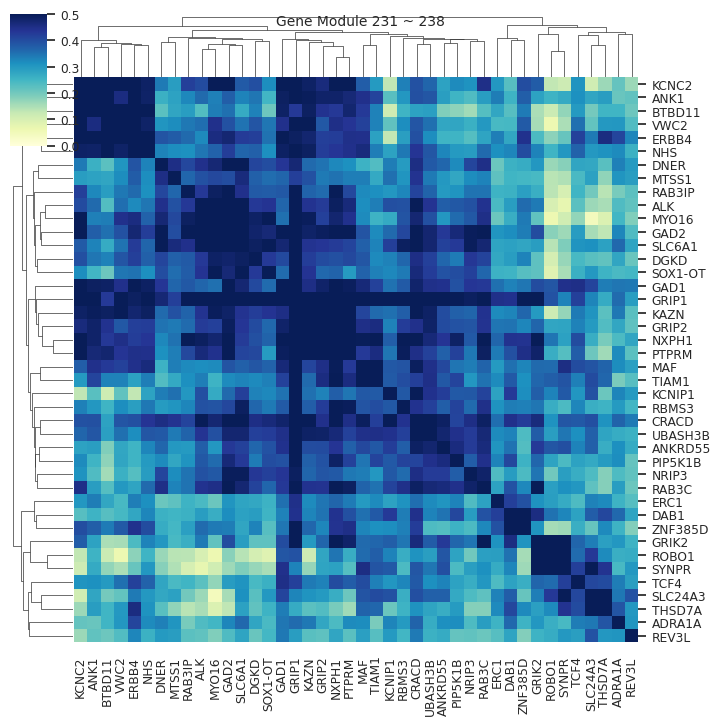

<Figure size 670x670 with 0 Axes>

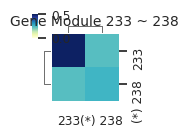

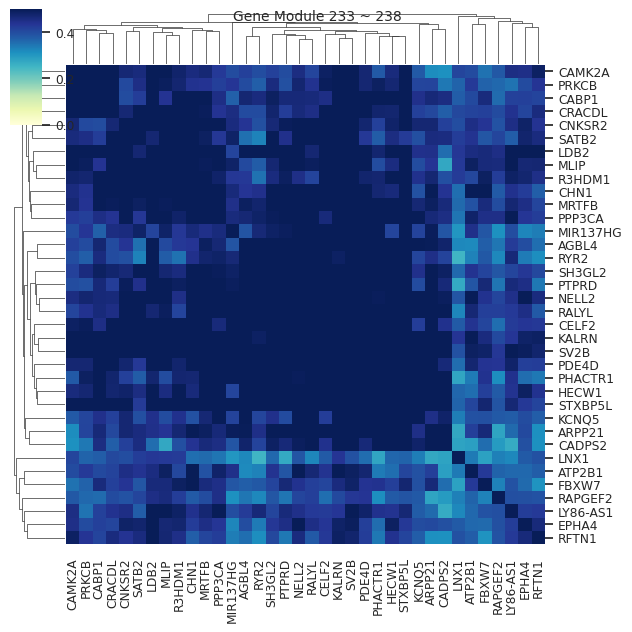

<Figure size 1000x1000 with 0 Axes>

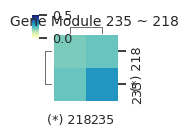

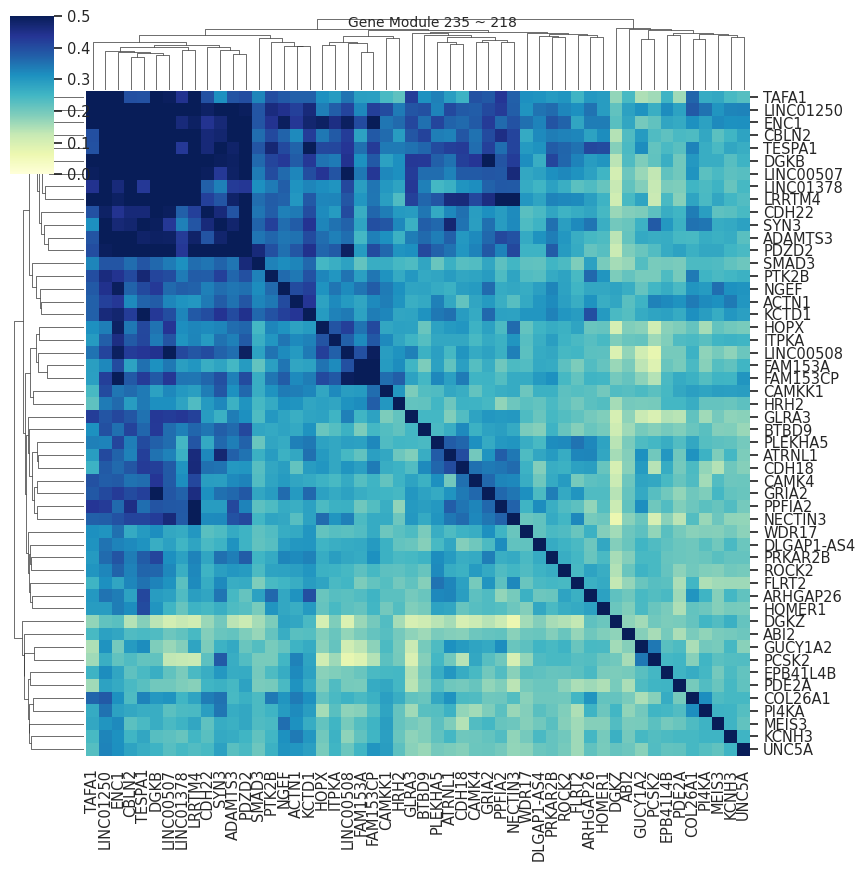

<Figure size 850x850 with 0 Axes>

<Figure size 685x685 with 0 Axes>

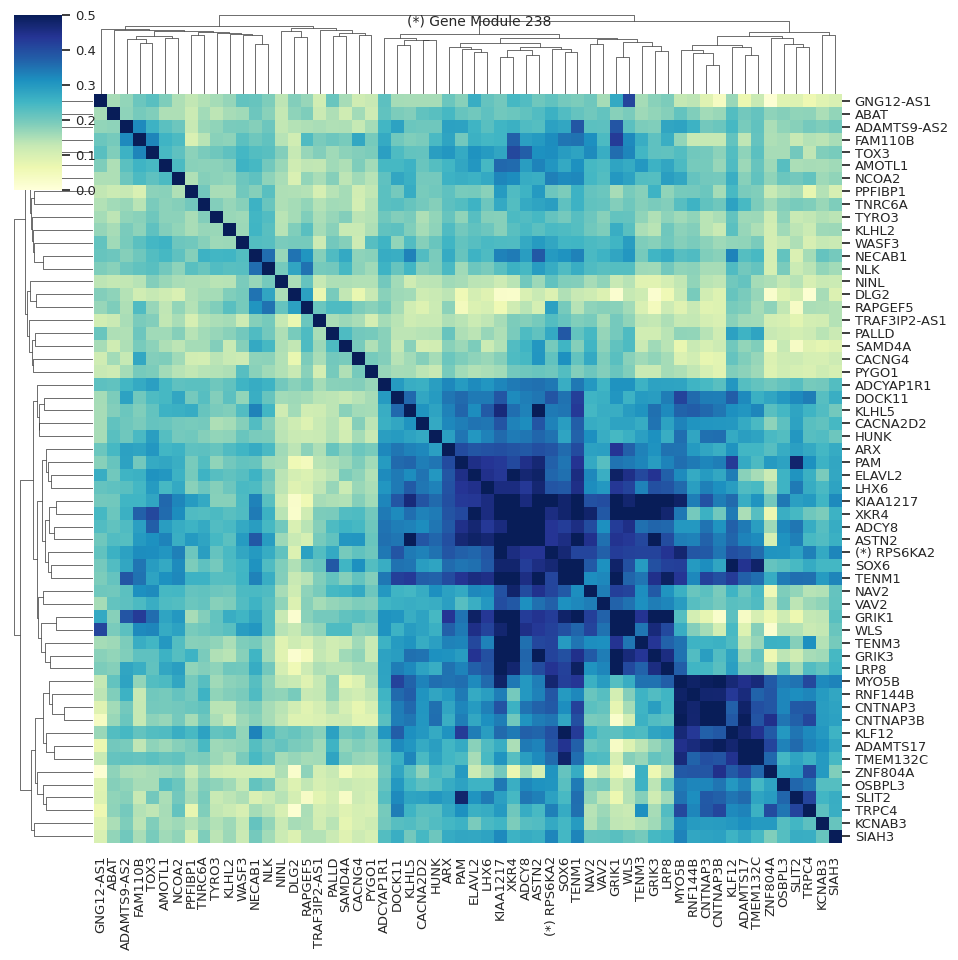

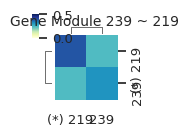

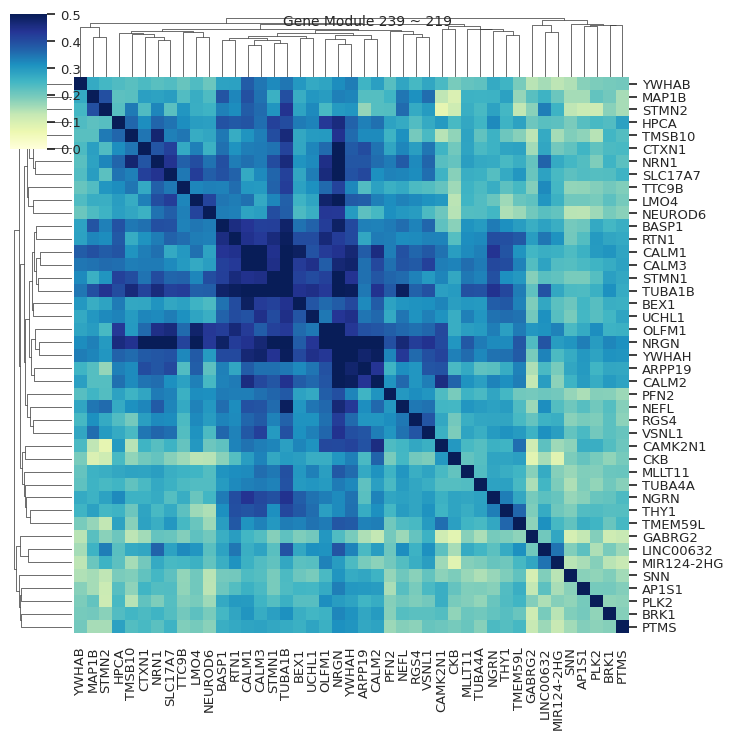

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [26]:
SHOW_CORRELATED_MODULES = (
    0.2  # Show non-lateral modules if correlated to lateral modules.
)
MIN_SIMILARITY_TO_SHOW = 0.2  # Show modules only if there's at least this correlation

base_lateral_gene_modules = np.unique(module_per_gene.values[base_lateral_genes_mask])
base_lateral_gene_modules = base_lateral_gene_modules[base_lateral_gene_modules >= 0]
similarity_of_genes = mc.ut.get_vv_frame(cells, "lateral_genes_similarity")

for gene_module in range(np.max(module_per_gene) + 1):
    module_genes_mask = module_per_gene.values == gene_module
    similarity_of_module = similarity_of_genes.loc[module_genes_mask, module_genes_mask]
    similarity_of_module.index = similarity_of_module.columns = [
        "(*) " + name if name in base_lateral_gene_names else name
        for name in similarity_of_module.index
    ]

    mask = similarity_of_module.values.copy()
    np.fill_diagonal(mask, 0.0)
    max_value = np.max(mask)
    show_in_notebook = (
        gene_module in base_lateral_gene_modules or max_value >= MIN_SIMILARITY_TO_SHOW
    )

    similarity_to_laterals = similarity_of_modules.iloc[
        gene_module, base_lateral_gene_modules
    ]
    similar_lateral_modules_mask = similarity_to_laterals >= SHOW_CORRELATED_MODULES
    similar_lateral_modules = base_lateral_gene_modules[
        np.where(similar_lateral_modules_mask)[0]
    ]
    if (
        gene_module not in base_lateral_gene_modules
        and len(similar_lateral_modules) == 0
    ):
        show_in_notebook = False

    prefix = "(*) " if gene_module in base_lateral_gene_modules else ""
    suffix = ", ".join(
        [
            str(similar_lateral_module)
            for similar_lateral_module in similar_lateral_modules
            if similar_lateral_module != gene_module
        ]
    )
    if suffix != "":
        suffix = " ~ " + suffix
    title = f"{prefix}Gene Module {gene_module}{suffix}"

    if len(similar_lateral_modules) > 0:
        with_lateral_modules = set(similar_lateral_modules)
        with_lateral_modules.add(gene_module)
        with_lateral_modules = sorted(with_lateral_modules)
        if len(with_lateral_modules) > 1:
            similarity_with_module = similarity_of_modules.iloc[
                with_lateral_modules, :
            ].iloc[:, with_lateral_modules]

            size = similarity_with_module.shape[0]
            if size > 50:
                sb.set(font_scale=50 / size)
            size = size * 0.15 + 1
            cm = sb.clustermap(
                similarity_with_module,
                figsize=(size, size),
                vmin=0,
                vmax=0.5,
                xticklabels=True,
                yticklabels=True,
                dendrogram_ratio=0.1,
                cmap="YlGnBu",
            )
            cm.fig.suptitle(title, fontsize=10)
            if show_in_notebook:
                plt.show()
            else:
                plt.clf()

    size = similarity_of_module.shape[0]
    if size > 50:
        sb.set(font_scale=50 / size)
    size = size * 0.15 + 1
    cm = sb.clustermap(
        similarity_of_module,
        figsize=(size, size),
        vmin=0,
        vmax=0.5,
        xticklabels=True,
        yticklabels=True,
        dendrogram_ratio=0.1,
        cmap="YlGnBu",
    )
    cm.fig.suptitle(title, fontsize=10)
    if show_in_notebook:
        plt.show()
    else:
        plt.clf()

In [27]:
LATERAL_GENE_MODULES = [
    179,  # Ribosomal.
]
SPECIFIC_LATERAL_GENES = ["DUSP1"]  # Stress

In [28]:
for gene_module in LATERAL_GENE_MODULES:
    module_genes_mask = module_per_gene == gene_module
    update_lateral_genes(names=cells.var_names[module_genes_mask], op="add", show=False)
update_lateral_genes(names=SPECIFIC_LATERAL_GENES, op="add", show=False)

set human_mtg_iteration1.var[lateral_gene]: 130 true (0.6642%) out of 19571 bools
set human_mtg_iteration1.var[lateral_gene]: 131 true (0.6694%) out of 19571 bools


In [29]:
# Either use the guesstimator:
max_parallel_piles = mc.pl.guess_max_parallel_piles(cells)
# Or, if running out of memory manually override:
# max_paralle_piles = ...
print(max_parallel_piles)
mc.pl.set_max_parallel_piles(max_parallel_piles)

347


In [30]:
with mc.ut.progress_bar():
    mc.pl.divide_and_conquer_pipeline(
        cells,
        random_seed=123456,
    )

Detect rare gene modules...
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
  0%|          [00:00]/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/lib/python3.11/site-packages/anndata/_core/anndata.py:1118: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/nfs/research/icortes/ysong/anaconda3/envs/metacells094/

In [31]:
metacells = mc.pl.collect_metacells(
    cells, name="human_mtg_metacells", random_seed=123456
)
print(f"Iteration 1: {metacells.n_obs} metacells, {metacells.n_vars} genes")

set human_mtg_metacells.obs[grouped]: 6682 int64s
set human_mtg_metacells.obs[total_umis]: 6682 int64s
set human_mtg_metacells.layers[total_umis]: ndarray 6682 X 19571 float32s
set human_mtg_metacells.obs[__zeros_downsample_umis]: 6682 int64s
set human_mtg_metacells.layers[zeros]: ndarray 6682 X 19571 int32s
set human_mtg_iteration1.obs[metacell_name]: 141782 <U8s
set human_mtg_metacells.var[feature_is_filtered]: 0 true (0%) out of 19571 bools
set human_mtg_metacells.var[feature_name]: 19571 objects
set human_mtg_metacells.var[feature_reference]: 19571 objects
set human_mtg_metacells.var[feature_biotype]: 19571 objects
set human_mtg_metacells.var[bursty_lonely_gene]: 0 true (0%) out of 19571 bools
set human_mtg_metacells.var[properly_sampled_gene]: 19571 true (100%) out of 19571 bools
set human_mtg_metacells.var[excluded_gene]: 0 true (0%) out of 19571 bools
set human_mtg_metacells.var[full_gene_index]: 19571 int32s
set human_mtg_metacells.var[lateral_gene]: 131 true (0.6694%) out of 1

Iteration 1: 6682 metacells, 19571 genes


In [33]:
metacells

AnnData object with n_obs × n_vars = 6682 × 19571
    obs: 'grouped', 'total_umis', '__zeros_downsample_umis', 'metacells_rare_gene_module', 'rare_metacell'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'bursty_lonely_gene', 'properly_sampled_gene', 'excluded_gene', 'full_gene_index', 'lateral_gene', 'lateral_genes_module', 'selected_gene', 'rare_gene', 'rare_gene_module'
    uns: '__name__', 'outliers', 'metacells_algorithm'
    layers: 'total_umis', 'zeros'

## Add subclass annotation 

In [34]:
# We'll reuse this through the iterations.
def convey_cell_annotations_to_metacells(anno_col, anno_col_target) -> None:

    # Assign a single value for each metacell based on the cells.
    mc.tl.convey_obs_to_group(
        adata=cells,
        gdata=metacells,
        property_name=anno_col,
        to_property_name=anno_col_target,
        method=mc.ut.most_frequent,  # This is the default, for categorical data
    )

    # Compute the fraction of cells with each possible value in each metacell:
    mc.tl.convey_obs_fractions_to_group(
        adata=cells,
        gdata=metacells,
        property_name=anno_col,
        to_property_name=anno_col_target,
    )


convey_cell_annotations_to_metacells(anno_col="Subclass", anno_col_target="Subclass")

set human_mtg_metacells.obs[Subclass]: 6682 <U10s
set human_mtg_metacells.obs[Subclass_fraction_of_Astro]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_Chandelier]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_Endo]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_L2/3 IT]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_L4 IT]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_L5 ET]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_L5 IT]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_L5/6 NP]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_L6 CT]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_L6 IT]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_L6 IT Car3]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_L6b]: 6682 float64s
set human_mtg_metacells.obs[Subclass_fraction_of_Lamp5]: 6682 float64s
set human_mtg_me

In [36]:
cells

AnnData object with n_obs × n_vars = 141782 × 19571
    obs: 'Cluster', 'Neighborhood', 'Subclass', 'CrossSpeciesCluster', 'nCount_RNA', 'nFeature_RNA', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'excluded_umis', 'properly_sampled_cell', 'excluded_cell', 'full_cell_index', 'metacell', 'dissolved', 'metacell_level', 'cells_rare_gene_module', 'rare_cell', 'metacell_name'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'bursty_lonely_gene', 'properly_sampled_gene', 'excluded_gene', 'full_gene_index', 'lateral_gene', 'lateral_genes_module', 'selected_gene', 'rare_gene', 'rare_gene_module'
    u

In [37]:
set(metacells.obs.Subclass.astype("category").cat.categories).symmetric_difference(
    set(cells.obs.Subclass.cat.categories)
)

set()

In [38]:
metacells.write("human_metacells_subclass.h5ad")

In [39]:
import gc

gc.collect()

481

In [40]:
cells.write("human_single_cell_with_metacells.h5ad")

In [41]:
# We'll reuse this through the iterations.
def convey_cell_annotations_to_metacells(anno_col, anno_col_target) -> None:

    # Assign a single value for each metacell based on the cells.
    mc.tl.convey_obs_to_group(
        adata=cells,
        gdata=metacells,
        property_name=anno_col,
        to_property_name=anno_col_target,
        method=mc.ut.most_frequent,  # This is the default, for categorical data
    )

    # Compute the fraction of cells with each possible value in each metacell:
    mc.tl.convey_obs_fractions_to_group(
        adata=cells,
        gdata=metacells,
        property_name=anno_col,
        to_property_name=anno_col_target,
    )


convey_cell_annotations_to_metacells(anno_col="cell_type", anno_col_target="cell_type")

set human_mtg_metacells.obs[cell_type]: 6682 <U66s
set human_mtg_metacells.obs[cell_type_fraction_of_L2/3-6 intratelencephalic projecting glutamatergic cortical neuron]: 6682 float64s
set human_mtg_metacells.obs[cell_type_fraction_of_L5 extratelencephalic projecting glutamatergic cortical neuron]: 6682 float64s
set human_mtg_metacells.obs[cell_type_fraction_of_L6b glutamatergic cortical neuron]: 6682 float64s
set human_mtg_metacells.obs[cell_type_fraction_of_astrocyte of the cerebral cortex]: 6682 float64s
set human_mtg_metacells.obs[cell_type_fraction_of_caudal ganglionic eminence derived GABAergic cortical interneuron]: 6682 float64s
set human_mtg_metacells.obs[cell_type_fraction_of_cerebral cortex endothelial cell]: 6682 float64s
set human_mtg_metacells.obs[cell_type_fraction_of_chandelier pvalb GABAergic cortical interneuron]: 6682 float64s
set human_mtg_metacells.obs[cell_type_fraction_of_corticothalamic-projecting glutamatergic cortical neuron]: 6682 float64s
set human_mtg_metace

In [42]:
set(metacells.obs.cell_type.astype("category").cat.categories).symmetric_difference(
    set(cells.obs.cell_type.cat.categories)
)

set()

In [69]:
metacells = metacells.layers["total_umis"].copy()

In [43]:
metacells.write("human_metacells_subclass.h5ad")

In [44]:
import gc

gc.collect()

0

In [70]:
cells.obs.columns

Index(['Cluster', 'Neighborhood', 'Subclass', 'CrossSpeciesCluster',
       'nCount_RNA', 'nFeature_RNA', 'assay_ontology_term_id',
       'cell_type_ontology_term_id', 'development_stage_ontology_term_id',
       'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id',
       'organism_ontology_term_id', 'sex_ontology_term_id', 'suspension_type',
       'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'cell_type',
       'assay', 'disease', 'organism', 'sex', 'tissue',
       'self_reported_ethnicity', 'development_stage', 'excluded_umis',
       'properly_sampled_cell', 'excluded_cell', 'full_cell_index', 'metacell',
       'dissolved', 'metacell_level', 'cells_rare_gene_module', 'rare_cell',
       'metacell_name'],
      dtype='object')

In [76]:
cl_tbl = (
    cells.obs[
        [
            "Subclass",
            "cell_type",
            "cell_type_ontology_term_id",
            "tissue",
            "tissue_ontology_term_id",
        ]
    ]
    .reset_index(drop=True)
    .drop_duplicates(subset=["Subclass"])
)

In [79]:
cl_tbl.Subclass.cat.categories

Index(['Astro', 'Chandelier', 'Endo', 'L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT',
       'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Lamp5_Lhx6',
       'Micro-PVM', 'OPC', 'Oligo', 'Pax6', 'Pvalb', 'Sncg', 'Sst',
       'Sst Chodl', 'VLMC', 'Vip'],
      dtype='object')